In [1]:
import os
import sys
from datetime import datetime
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.path as mpath
import seaborn as sns
from scipy.stats import ks_2samp, gaussian_kde
from scipy.stats import ttest_ind
from statsmodels.distributions.empirical_distribution import ECDF

# Add the parent directory of current directory to the Python path
sys.path.insert(0, os.path.abspath('..'))

from src.utils.process_session import *
from src.utils.optostim import *

### metadata and extract some data for writing codes

In [2]:
# metadata
Experiment = "test_data"
Animals = ["SP128"]
Group = ["rILT-GtACR"]
Path_To_Raw_Data = "/home/sthitapati/Documents/sequence_data/bpod_raw_data"
Camera_Folder = "/home/sthitapati/Documents/sequence_data/SP_FlyCap"
Output_Folder = "/home/sthitapati/Documents/sequence_data/seq_optoinhibition/output"


In [4]:
current_animal = Animals[0]
# print(current_animal)

all_sessions_file_name = os.path.join(Output_Folder, current_animal, f'{current_animal}_transition_data_all_sessions.csv')
print(all_sessions_file_name)


/home/sthitapati/Documents/sequence_data/seq_optoinhibition/output/SP128/SP128_transition_data_all_sessions.csv


In [5]:
allsessions_DF = pd.read_csv(all_sessions_file_name)
allsessions_DF.head()

,Unnamed: 0,trial_id,transition_type,start_poke_port,end_poke_port,start_poke_in_timestamp,start_poke_out_timestamp,end_poke_in_timestamp,end_poke_out_timestamp,out_in_latency,...,opto_stimulated_port,training_level,led_intensities_ports_2_3_4_5,reward_amounts_ports_1_2_3_4,cumulative_trial_id,session_id,date,day,animal_id,group
0,0,1,77,7,7,91.7429,91.8678,91.9091,92.6615,0.0413,...,NaN,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-07-17,Mon,SP128,rILT-GtACR
1,1,1,72,7,2,91.9091,92.6615,99.4489,99.6175,6.7874,...,NaN,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-07-17,Mon,SP128,rILT-GtACR
2,2,1,22,2,2,99.4489,99.6175,99.6904,100.1928,0.0729,...,NaN,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-07-17,Mon,SP128,rILT-GtACR
3,3,1,22,2,2,99.6904,100.1928,123.7442,124.0751,23.5514,...,NaN,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-07-17,Mon,SP128,rILT-GtACR
4,4,1,22,2,2,123.7442,124.0751,124.2643,124.8415,0.1892,...,NaN,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-07-17,Mon,SP128,rILT-GtACR


In [6]:
# now loop through all Animals and concat the dataframes to create allsessions_DF

for i, current_animal in enumerate(Animals):
    print(current_animal)
    all_sessions_file_name = os.path.join(Output_Folder, current_animal, f'{current_animal}_transition_data_all_sessions.csv')
    print(all_sessions_file_name)
    current_DF = pd.read_csv(all_sessions_file_name)
    if i == 0:
        allsessions_DF = current_DF
    else:
        allsessions_DF = pd.concat([allsessions_DF, current_DF], axis=0)

allsessions_DF.head()

SP128
/home/sthitapati/Documents/sequence_data/seq_optoinhibition/output/SP128/SP128_transition_data_all_sessions.csv


,Unnamed: 0,trial_id,transition_type,start_poke_port,end_poke_port,start_poke_in_timestamp,start_poke_out_timestamp,end_poke_in_timestamp,end_poke_out_timestamp,out_in_latency,...,opto_stimulated_port,training_level,led_intensities_ports_2_3_4_5,reward_amounts_ports_1_2_3_4,cumulative_trial_id,session_id,date,day,animal_id,group
0,0,1,77,7,7,91.7429,91.8678,91.9091,92.6615,0.0413,...,NaN,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-07-17,Mon,SP128,rILT-GtACR
1,1,1,72,7,2,91.9091,92.6615,99.4489,99.6175,6.7874,...,NaN,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-07-17,Mon,SP128,rILT-GtACR
2,2,1,22,2,2,99.4489,99.6175,99.6904,100.1928,0.0729,...,NaN,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-07-17,Mon,SP128,rILT-GtACR
3,3,1,22,2,2,99.6904,100.1928,123.7442,124.0751,23.5514,...,NaN,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-07-17,Mon,SP128,rILT-GtACR
4,4,1,22,2,2,123.7442,124.0751,124.2643,124.8415,0.1892,...,NaN,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-07-17,Mon,SP128,rILT-GtACR


In [7]:
# get session settings loop through all Animals and concat the dataframes to create session_settings_DF
# append name of current animal to the session_settings_DF

for i, current_animal in enumerate(Animals):
    print(current_animal)
    current_DF = get_session_details(Output_Folder, current_animal)
    current_DF['Animal'] = current_animal
    if i == 0:
        session_details_DF = current_DF
    else:
        session_details_DF = pd.concat([session_details_DF, current_DF], axis=0)

session_details_DF.head()

SP128


,session_id,session,date,file_number,day,opto_session,experiment_type,Animal
0,0,00_20230717_145653_Mon,2023-07-17,145653,Mon,False,1_Training,SP128
1,1,01_20230718_121135_Tue,2023-07-18,121135,Tue,False,1_Training,SP128
2,2,02_20230719_140056_Wed,2023-07-19,140056,Wed,False,1_Training,SP128
3,3,03_20230721_110730_Fri,2023-07-21,110730,Fri,False,1_Training,SP128
4,4,04_20230724_133516_Mon,2023-07-24,133516,Mon,False,1_Training,SP128


In [8]:
sess = session_details_DF['session'].loc[(session_details_DF['session_id'] == 1) & (session_details_DF['Animal'] == 'SP108')].to_string(index=False)
print(sess)

Series([], )


In [9]:
# get al unique animals in the session_settings_DF and loop through them to get the opto session ids
# create a dictionary with key as animal name and value as opto session ids

for current_animal in session_details_DF['Animal'].unique():
    print(current_animal)
    current_animal_DF = session_details_DF[session_details_DF['Animal'] == current_animal]
    opto_session_ids = get_opto_sessions(current_animal_DF)
    if current_animal == Animals[0]:
        opto_sessions_dict = {current_animal: opto_session_ids}
    else:
        opto_sessions_dict.update({current_animal: opto_session_ids})

print(opto_sessions_dict)
    

SP128
{'SP128': [21, 22]}


In [10]:
# for all sessions with opto_stim, get the opto_stim settings from settings.json file in each session folder
# the session folders are organised in os.path.join(Output_Folder, current_animal, f'{current_animal}, session)
# read the value of TrainDuration and append the value to a column named stim_duration to allsessions_DF

# Check if the 'stim_duration' column exists, if not, create it
if 'stim_duration' not in allsessions_DF.columns:
    allsessions_DF['stim_duration'] = np.nan

for current_animal in opto_sessions_dict.keys():
    # print(current_animal) for debugging
    opto_session_ids = opto_sessions_dict[current_animal]
    # print(opto_session_ids) for debugging

    for current_session in opto_session_ids:
        session_folder = session_details_DF['session'].loc[(session_details_DF['session_id'] == current_session) & (session_details_DF['Animal'] == current_animal)].to_string(index=False).strip()
        settings_file_name = os.path.join(Output_Folder, current_animal, 'Preprocessed', session_folder, 'settings.json')
        # print(settings_file_name) for debugging
        with open(settings_file_name) as f:
            data = json.load(f)
        stim_duration = data['TrainDuration']
        # print(stim_duration) for debugging
        allsessions_DF['stim_duration'].loc[(allsessions_DF['session_id'] == current_session) & (allsessions_DF['animal_id'] == current_animal)] = stim_duration
allsessions_DF.head()

,Unnamed: 0,trial_id,transition_type,start_poke_port,end_poke_port,start_poke_in_timestamp,start_poke_out_timestamp,end_poke_in_timestamp,end_poke_out_timestamp,out_in_latency,...,training_level,led_intensities_ports_2_3_4_5,reward_amounts_ports_1_2_3_4,cumulative_trial_id,session_id,date,day,animal_id,group,stim_duration
0,0,1,77,7,7,91.7429,91.8678,91.9091,92.6615,0.0413,...,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-07-17,Mon,SP128,rILT-GtACR,NaN
1,1,1,72,7,2,91.9091,92.6615,99.4489,99.6175,6.7874,...,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-07-17,Mon,SP128,rILT-GtACR,NaN
2,2,1,22,2,2,99.4489,99.6175,99.6904,100.1928,0.0729,...,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-07-17,Mon,SP128,rILT-GtACR,NaN
3,3,1,22,2,2,99.6904,100.1928,123.7442,124.0751,23.5514,...,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-07-17,Mon,SP128,rILT-GtACR,NaN
4,4,1,22,2,2,123.7442,124.0751,124.2643,124.8415,0.1892,...,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-07-17,Mon,SP128,rILT-GtACR,NaN


In [11]:
# get the transition data for all sessions with opto_condition == 1

allsessions_DF_opto = allsessions_DF.loc[allsessions_DF['opto_condition'] == 1]
allsessions_DF_opto.head()

,Unnamed: 0,trial_id,transition_type,start_poke_port,end_poke_port,start_poke_in_timestamp,start_poke_out_timestamp,end_poke_in_timestamp,end_poke_out_timestamp,out_in_latency,...,training_level,led_intensities_ports_2_3_4_5,reward_amounts_ports_1_2_3_4,cumulative_trial_id,session_id,date,day,animal_id,group,stim_duration
57705,162,15,26,2,6,453.8373,453.8850,454.3412,454.4320,0.4562,...,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",7005,21,2023-08-17,Thu,SP128,rILT-GtACR,1.5
57706,163,15,66,6,6,454.3412,454.4320,454.4728,454.5060,0.0408,...,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",7005,21,2023-08-17,Thu,SP128,rILT-GtACR,1.5
57707,164,15,66,6,6,454.4728,454.5060,454.6260,454.7106,0.1200,...,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",7005,21,2023-08-17,Thu,SP128,rILT-GtACR,1.5
57708,165,15,62,6,2,454.6260,454.7106,454.8206,454.8409,0.1100,...,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",7005,21,2023-08-17,Thu,SP128,rILT-GtACR,1.5
57709,166,15,21,2,1,454.8206,454.8409,455.1262,455.1549,0.2853,...,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",7005,21,2023-08-17,Thu,SP128,rILT-GtACR,1.5


In [12]:
# make a dataframe by filtering for opto sessions with allsessions_DF['session_id'] = opto_session_ids

opto_df = allsessions_DF.loc[allsessions_DF['session_id'].isin(opto_session_ids)]
opto_df.head()

,Unnamed: 0,trial_id,transition_type,start_poke_port,end_poke_port,start_poke_in_timestamp,start_poke_out_timestamp,end_poke_in_timestamp,end_poke_out_timestamp,out_in_latency,...,training_level,led_intensities_ports_2_3_4_5,reward_amounts_ports_1_2_3_4,cumulative_trial_id,session_id,date,day,animal_id,group,stim_duration
57543,0,1,21,2,1,354.4674,354.4943,357.7395,357.9005,3.2452,...,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",6991,21,2023-08-17,Thu,SP128,rILT-GtACR,1.5
57544,1,1,15,1,5,357.7395,357.9005,363.6940,363.7279,5.7935,...,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",6991,21,2023-08-17,Thu,SP128,rILT-GtACR,1.5
57545,2,1,57,5,7,363.6940,363.7279,365.6412,365.7574,1.9133,...,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",6991,21,2023-08-17,Thu,SP128,rILT-GtACR,1.5
57546,3,2,73,7,3,365.6412,365.7574,367.3271,367.4207,1.5697,...,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",6992,21,2023-08-17,Thu,SP128,rILT-GtACR,1.5
57547,4,2,32,3,2,367.3271,367.4207,367.6890,367.8409,0.2683,...,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",6992,21,2023-08-17,Thu,SP128,rILT-GtACR,1.5


In [13]:
# info

# opto_df.info()

In [14]:
# Count the occurrences of each unique value in 'opto_condition'
opto_condition_counts = opto_df['opto_condition'].value_counts()
print('summary of opto-transitions \n', opto_condition_counts)

# Count the occurrences of each unique value in 'opto_stimulated_port'
opto_stimulated_port_counts = opto_df['opto_stimulated_port'].value_counts()
print('specific ports \n', opto_stimulated_port_counts)

summary of opto-transitions 
 1.0    455
Name: opto_condition, dtype: int64
specific ports 
 2.0    193
3.0    131
1.0     76
4.0     55
Name: opto_stimulated_port, dtype: int64


In [15]:
# count number of control trials
# nan_counts_opto_condition = opto_df['opto_condition'].isna().sum()
# print('opto_stim', nan_counts_opto_condition)

nan_counts_opto_stimulated_port = opto_df['opto_stimulated_port'].isna().sum()
print('all_ports', nan_counts_opto_stimulated_port)

all_ports 3382


In [16]:
# now just look at control data and develop plotting functionality

control_df = opto_df[opto_df['opto_condition'].isna()]
control_df.head()

,Unnamed: 0,trial_id,transition_type,start_poke_port,end_poke_port,start_poke_in_timestamp,start_poke_out_timestamp,end_poke_in_timestamp,end_poke_out_timestamp,out_in_latency,...,training_level,led_intensities_ports_2_3_4_5,reward_amounts_ports_1_2_3_4,cumulative_trial_id,session_id,date,day,animal_id,group,stim_duration
57543,0,1,21,2,1,354.4674,354.4943,357.7395,357.9005,3.2452,...,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",6991,21,2023-08-17,Thu,SP128,rILT-GtACR,1.5
57544,1,1,15,1,5,357.7395,357.9005,363.6940,363.7279,5.7935,...,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",6991,21,2023-08-17,Thu,SP128,rILT-GtACR,1.5
57545,2,1,57,5,7,363.6940,363.7279,365.6412,365.7574,1.9133,...,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",6991,21,2023-08-17,Thu,SP128,rILT-GtACR,1.5
57546,3,2,73,7,3,365.6412,365.7574,367.3271,367.4207,1.5697,...,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",6992,21,2023-08-17,Thu,SP128,rILT-GtACR,1.5
57547,4,2,32,3,2,367.3271,367.4207,367.6890,367.8409,0.2683,...,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",6992,21,2023-08-17,Thu,SP128,rILT-GtACR,1.5


In [17]:
# control_df.info()

In [18]:
control_df.groupby(['end_poke_port', 'start_poke_port']).size().unstack()

start_poke_port,1,2,3,4,5,6,7,8
end_poke_port,,,,,,,,
1,145.0,342.0,8.0,2.0,2.0,56.0,50.0,NaN
2,41.0,67.0,26.0,4.0,1.0,97.0,323.0,2.0
3,89.0,27.0,92.0,3.0,2.0,288.0,215.0,2.0
4,2.0,2.0,NaN,2.0,1.0,1.0,2.0,2.0
5,4.0,1.0,2.0,NaN,3.0,2.0,2.0,NaN
6,305.0,107.0,14.0,NaN,3.0,149.0,81.0,NaN
7,20.0,9.0,575.0,1.0,2.0,67.0,127.0,2.0
8,NaN,1.0,2.0,2.0,NaN,NaN,2.0,3.0


In [19]:
# Create mapping from old port numbers to new names
port_mapping = {2: 'port 1', 1: 'port 2', 6: 'port 3', 3: 'port 4', 7: 'port 5'}

# If there are other ports not included in the correct sequence, map them to X, Y, Z
# Note: replace 4, 5, 8 with actual port numbers if different
port_mapping.update({4: 'port X', 5: 'port Y', 8: 'port Z'})

In [20]:
def plot_vertical_transition_matrix(df, normalize=False, display_numbers=False, additional_title=None, ax=None, colorbar=True):
    # Create a copy of df
    df_copy = df.copy()

    # Mapping dictionary
    port_mapping = {2: 'port 1', 1: 'port 2', 6: 'port 3', 3: 'port 4', 7: 'port 5',
                    4: 'port X', 5: 'port Y', 8: 'port Z'}

    # Apply mapping to start_poke_port and end_poke_port
    df_copy['start_poke_port'] = df_copy['start_poke_port'].map(port_mapping)
    df_copy['end_poke_port'] = df_copy['end_poke_port'].map(port_mapping)

    # Group by end and start port and count the number of each transition
    transition_counts = df_copy.groupby(['end_poke_port', 'start_poke_port']).size().unstack(fill_value=0)

    # Reorder the columns and rows
    ordered_ports = ['port 1', 'port 2', 'port 3', 'port 4', 'port 5', 'port X', 'port Y', 'port Z']
    transition_counts = transition_counts.reindex(index=ordered_ports[::-1], columns=ordered_ports)

    # Convert to numpy array for easier manipulation and replace np.nan with 0
    transition_counts = np.nan_to_num(transition_counts.values)

    if normalize:
        # Normalize columns to get transition probabilities
        column_sums = transition_counts.sum(axis=0, keepdims=True)
        column_sums[column_sums == 0] = 1e-10  # replace 0 sums with a small number to avoid division by zero
        transition_counts = transition_counts / column_sums
        # print("Column sums after normalization:", transition_counts.sum(axis=0))  # Debug line to check the column sums ## for debugging
        colorbar_label = 'Transition Probabilities'
        title = 'State Transition Matrix'

    else:
        colorbar_label = 'Number of Transitions'
        title = 'Absolute Transition Matrix'

    # Add the additional title if specified by the user
    if additional_title:
        title = title + '\n' + additional_title

    # If no Axes object was provided, create a new one
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))

    # Plotting transition matrix, only select first 4 columns (Start Ports 1 to 4)
    cax = sns.heatmap(transition_counts[:,:4], annot=display_numbers, cmap='YlGnBu', vmin=0, vmax=0.9, ax=ax,
                      xticklabels=ordered_ports[:4], yticklabels=ordered_ports[::-1], cbar=colorbar)
    ax.set_title(title)
    ax.set_xlabel('Start Port')
    ax.set_ylabel('End Port')
    ax.set_aspect('equal')  # set aspect ratio
    # Add a horizontal line in between rows of port 5 and port X
    ax.axhline(y=3, color='k', linewidth=1)

    # Add a colorbar with label
    if colorbar:
        cbar = cax.collections[0].colorbar
        cbar.set_label(colorbar_label)

    # Save the figure
    save_path = os.path.join(Output_Folder, current_animal, 'plots', f'{additional_title}_heatmap.png')

    # Ensure the directory exists
    os.makedirs(os.path.join(Output_Folder, current_animal, 'plots'), exist_ok=True)

    plt.tight_layout()
   
    if ax is None:
        plt.show()  # Only show the plot if no Axes object was provided. If an Axes was provided, plt.show() should be called externally.


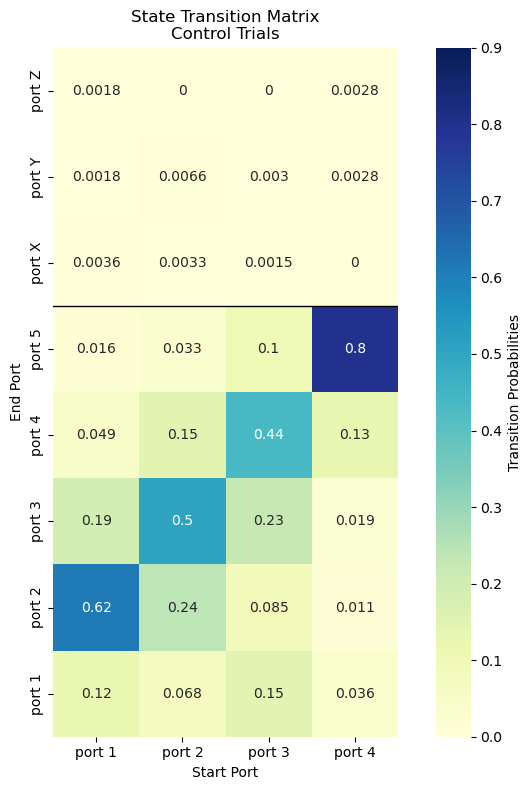

In [21]:

plot_vertical_transition_matrix(control_df, normalize=True, display_numbers=True, additional_title= 'Control Trials')
plt.show()

In [22]:
# filter opto_df for opto_condition == 1 and stim_duration == 1.5
# print(opto_df['stim_duration'].unique()) for debugging
stim_duration = 1.5
opto_df_1_5 = opto_df.loc[(opto_df['stim_duration'] == stim_duration)]
print(opto_df_1_5['stim_duration'].unique()) 


[1.5]


In [23]:
# set colorbar value range 0-0.9
# cbar = ax.collections[0].colorbar
# cbar.set_ticks([0, 0.9])
optostim_port_1 = opto_df_1_5[opto_df_1_5['opto_stimulated_port'] == 1]
optostim_port_2 = opto_df_1_5[opto_df_1_5['opto_stimulated_port'] == 2]
optostim_port_3 = opto_df_1_5[opto_df_1_5['opto_stimulated_port'] == 3]
optostim_port_4 = opto_df_1_5[opto_df_1_5['opto_stimulated_port'] == 4]


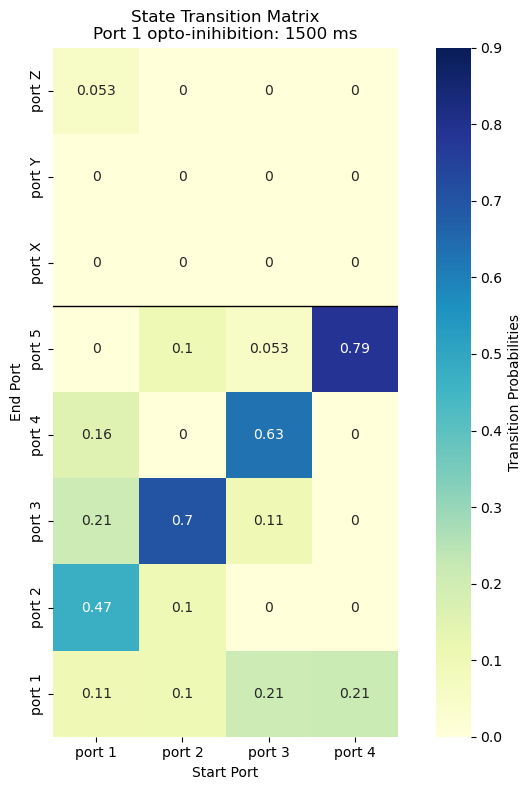

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_vertical_transition_matrix(optostim_port_1, normalize=True, display_numbers=True, additional_title= 'Port 1 opto-inihibition: 1500 ms', ax=ax)


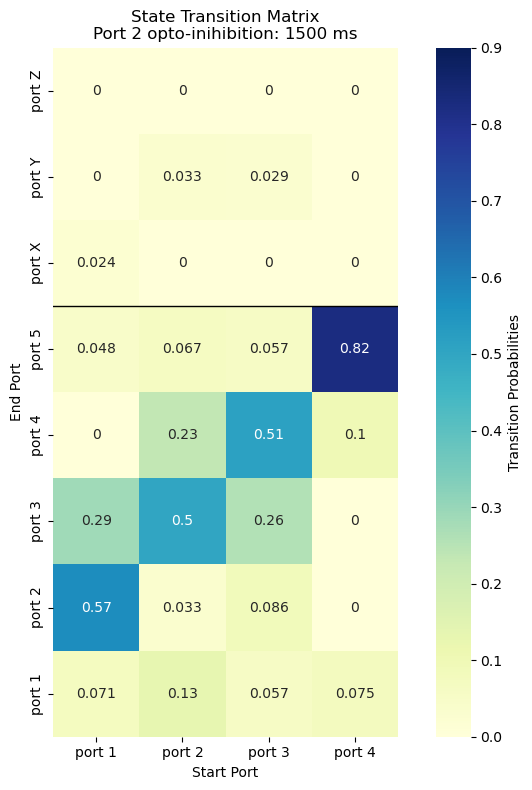

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_vertical_transition_matrix(optostim_port_2, normalize=True, display_numbers=True, additional_title= 'Port 2 opto-inihibition: 1500 ms', ax=ax)

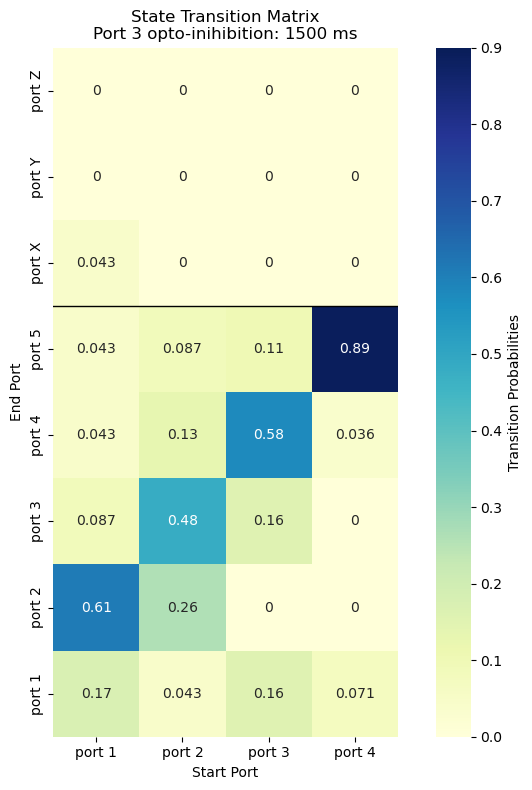

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_vertical_transition_matrix(optostim_port_3, normalize=True, display_numbers=True, additional_title= 'Port 3 opto-inihibition: 1500 ms', ax=ax)

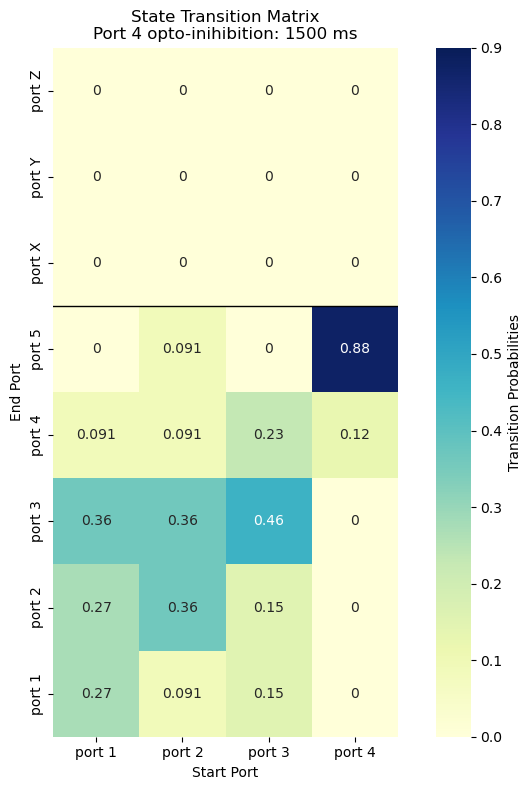

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_vertical_transition_matrix(optostim_port_4, normalize=True, display_numbers=True, additional_title= 'Port 4 opto-inihibition: 1500 ms', ax=ax)

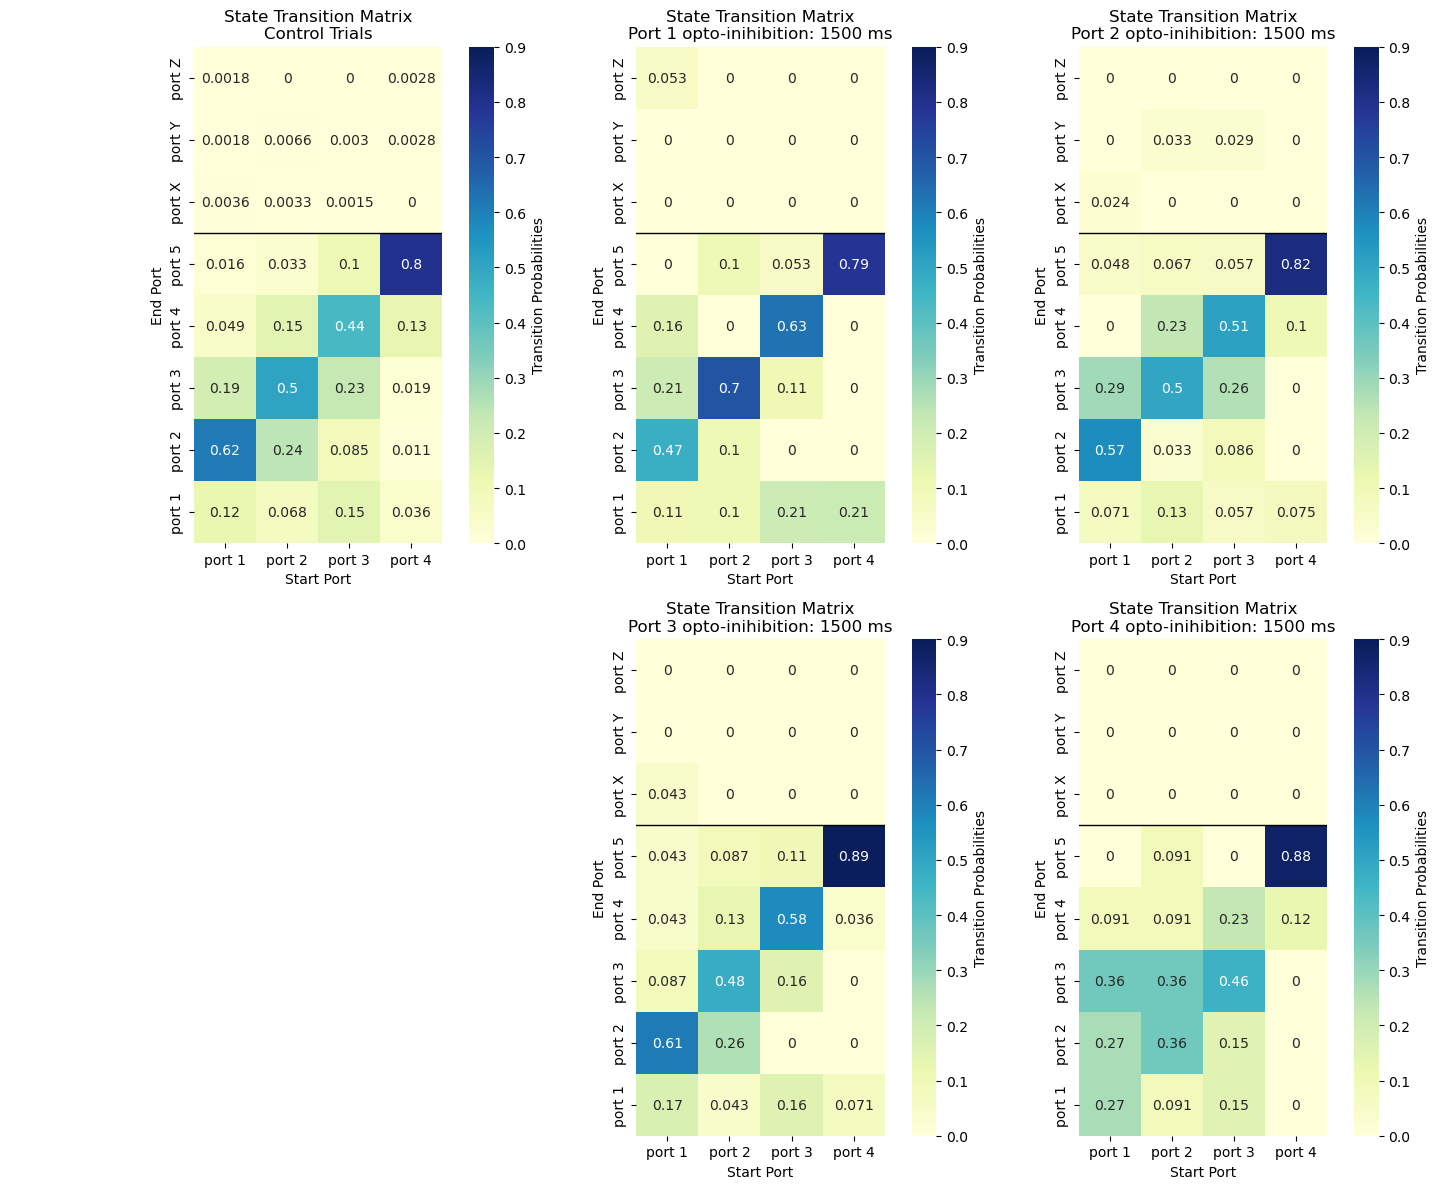

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

plot_vertical_transition_matrix(control_df, normalize=True, display_numbers=True, additional_title= 'Control Trials', ax=axs[0, 0])
plot_vertical_transition_matrix(optostim_port_1, normalize=True, display_numbers=True, additional_title= 'Port 1 opto-inihibition: 1500 ms', ax=axs[0, 1])
plot_vertical_transition_matrix(optostim_port_2, normalize=True, display_numbers=True, additional_title= 'Port 2 opto-inihibition: 1500 ms', ax=axs[0, 2])
plot_vertical_transition_matrix(optostim_port_3, normalize=True, display_numbers=True, additional_title= 'Port 3 opto-inihibition: 1500 ms', ax=axs[1, 1])
plot_vertical_transition_matrix(optostim_port_4, normalize=True, display_numbers=True, additional_title= 'Port 4 opto-inihibition: 1500 ms', ax=axs[1, 2])

# You can hide the unused subplot with this line
axs[1, 0].axis('off')

# Adjust spaces between subplots and around the plot
# fig.tight_layout()
fig.subplots_adjust(left=0.2) # You can adjust this value as needed
plt.show()


In [29]:
def plot_transition_matrix(df, normalize=False, display_numbers=False, additional_title=None, ax=None, colorbar=True,
                           limit_start_ports=False):
    # Create a copy of df
    df_copy = df.copy()

    # Mapping dictionary
    port_mapping = {2: 'port 1', 1: 'port 2', 6: 'port 3', 3: 'port 4', 7: 'port 5',
                    4: 'port X', 5: 'port Y', 8: 'port Z'}

    # Apply mapping to start_poke_port and end_poke_port
    df_copy['start_poke_port'] = df_copy['start_poke_port'].map(port_mapping)
    df_copy['end_poke_port'] = df_copy['end_poke_port'].map(port_mapping)

    # Group by start and end port and count the number of each transition
    transition_counts = df_copy.groupby(['start_poke_port', 'end_poke_port']).size().unstack(fill_value=0)

    # Transpose the transition_counts matrix, this is because sns.heatmap plots the first row at the top of the plot
    transition_counts = transition_counts.transpose()

    # Reorder the columns and rows
    ordered_ports = ['port 1', 'port 2', 'port 3', 'port 4', 'port 5', 'port X', 'port Y', 'port Z']
    transition_counts = transition_counts.reindex(index=ordered_ports[::-1], columns=ordered_ports)


    # Convert to numpy array for easier manipulation and replace np.nan with 0
    transition_counts = np.nan_to_num(transition_counts.values)

    if normalize:
        # Normalize across rows to get transition probabilities
        row_sums = transition_counts.sum(axis=0, keepdims=True)
        row_sums[row_sums == 0] = 1e-10  # replace 0 sums with a small number to avoid division by zero
        transition_counts = transition_counts / row_sums
        colorbar_label = 'Transition Probabilities'
        title = 'State Transition Matrix'

    else:
        colorbar_label = 'Number of Transitions'
        title = 'Absolute Transition Matrix'

    # Add the additional title if specified by the user
    if additional_title:
        title = title + '\n' + additional_title

    # If no Axes object was provided, create a new one
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))

    # Determine the number of start ports to include in the plot
    if limit_start_ports:
        start_ports_to_include = 4
    else:
        start_ports_to_include = transition_counts.shape[1]

    # Plotting transition matrix with colorbar length adjusted to match the heatmap
    cax = sns.heatmap(transition_counts[:,:start_ports_to_include], annot=display_numbers, fmt = ".2f", cmap='YlGnBu', vmin=0, vmax=0.9, ax=ax,
                      xticklabels=ordered_ports[:start_ports_to_include], yticklabels=ordered_ports[::-1], cbar=colorbar, 
                      cbar_kws={'shrink': .7})
                      
    ax.set_title(title)
    ax.set_xlabel('Start Port')
    ax.set_ylabel('End Port')
    ax.set_aspect('equal')  # set aspect ratio

    # Set rotation of xticklabels
    cax.set_xticklabels(cax.get_xticklabels(), rotation=0)

    # Add a blue horizontal line in between rows of port 5 and port X
    ax.axhline(y=3, color='b', linewidth=1)

    # Add a blue vertical line in between column of port 5 and port X
    ax.axvline(x=5, color='m', linewidth=1)

    # Add a colorbar with label
    if colorbar:
        cbar = cax.collections[0].colorbar
        cbar.set_label(colorbar_label)

    # Save the figure
    save_path = os.path.join(Output_Folder, current_animal, 'plots', f'{additional_title}_heatmap.png')

    # Ensure the directory exists
    os.makedirs(os.path.join(Output_Folder, current_animal, 'plots'), exist_ok=True)

    plt.tight_layout()

    if ax is None:
        plt.show()  # Only show the plot if no Axes object was provided. If an Axes was provided, plt.show() should be called externally.


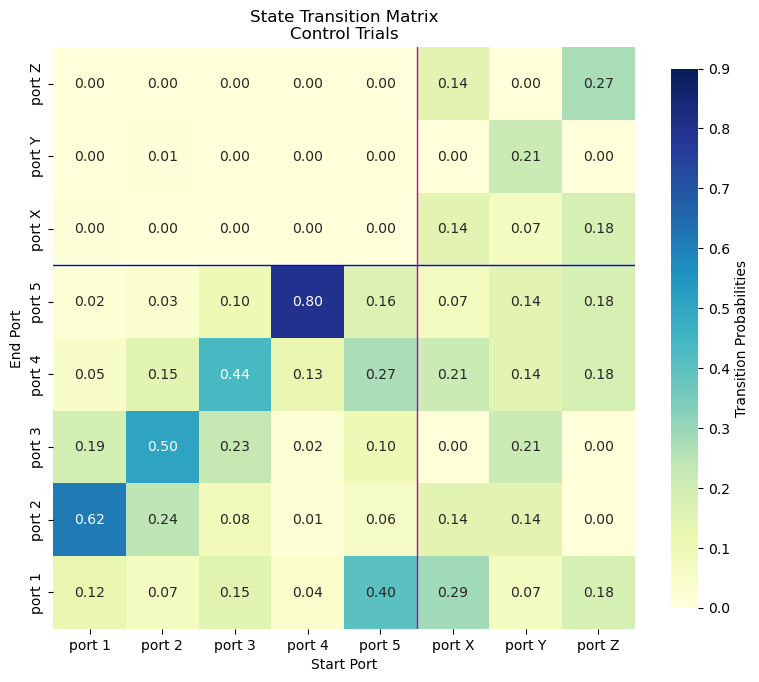

In [30]:

fig, ax = plt.subplots(figsize=(8, 8))
plot_transition_matrix(control_df, normalize=True, display_numbers=True, additional_title= 'Control Trials', ax=ax)
plt.show()

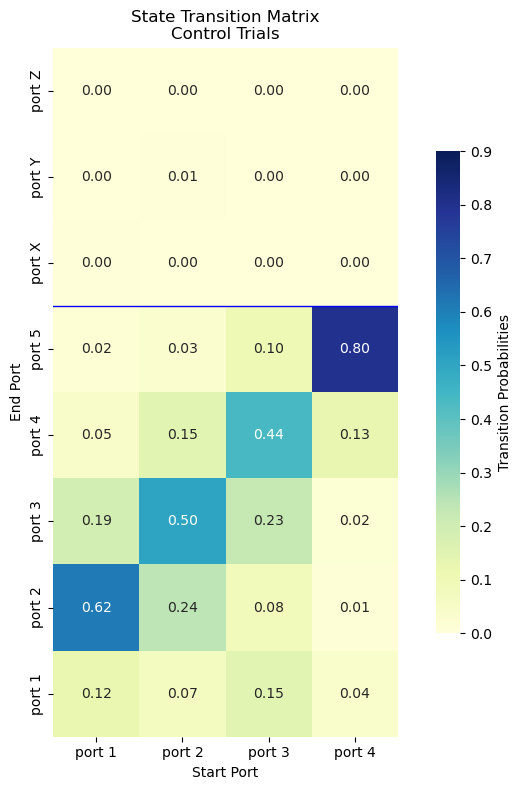

In [31]:

fig, ax = plt.subplots(figsize=(8, 8))
plot_transition_matrix(control_df, normalize=True, display_numbers=True, limit_start_ports=True ,additional_title= 'Control Trials', ax=ax)
plt.show()

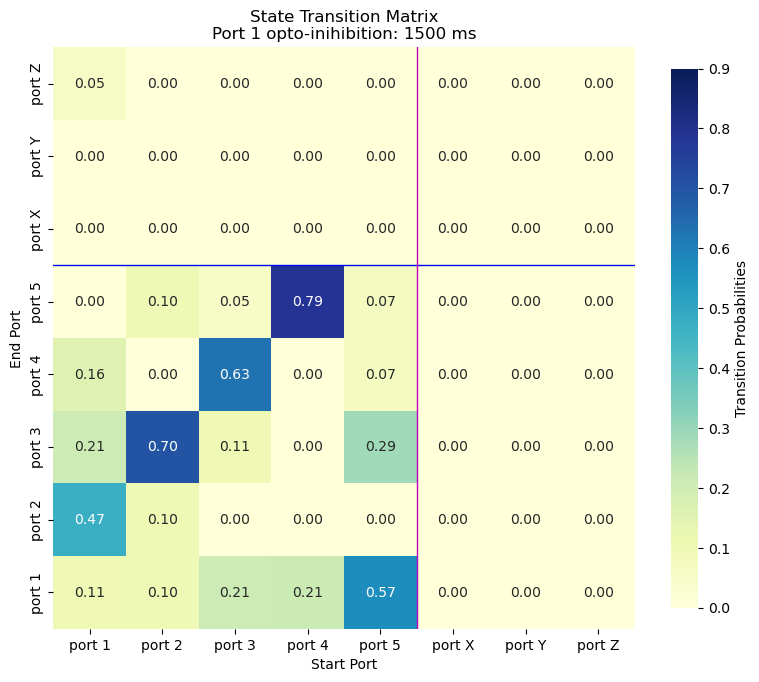

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_transition_matrix(optostim_port_1, normalize=True, display_numbers=True, limit_start_ports=False ,additional_title= 'Port 1 opto-inihibition: 1500 ms', ax=ax)
plt.show()

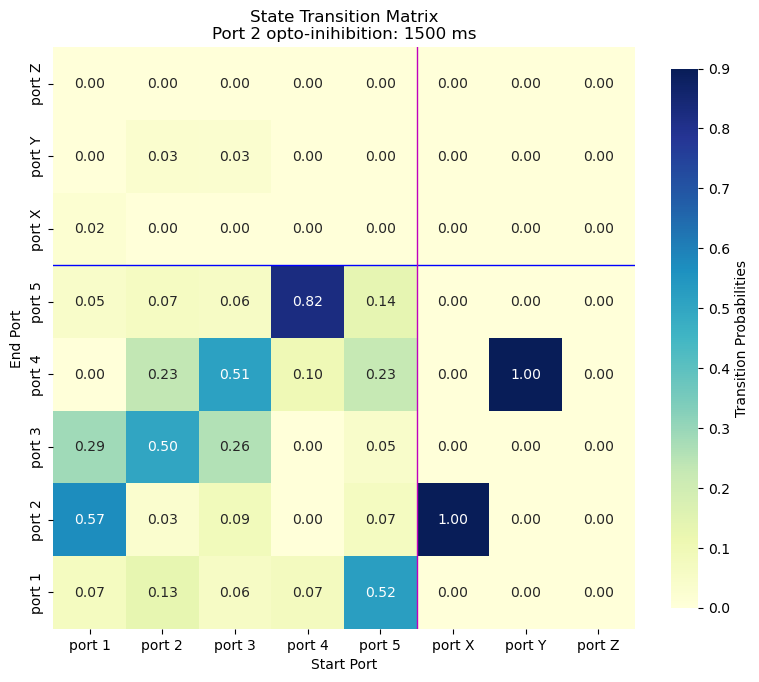

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_transition_matrix(optostim_port_2, normalize=True, display_numbers=True, limit_start_ports=False ,additional_title= 'Port 2 opto-inihibition: 1500 ms', ax=ax)
plt.show()

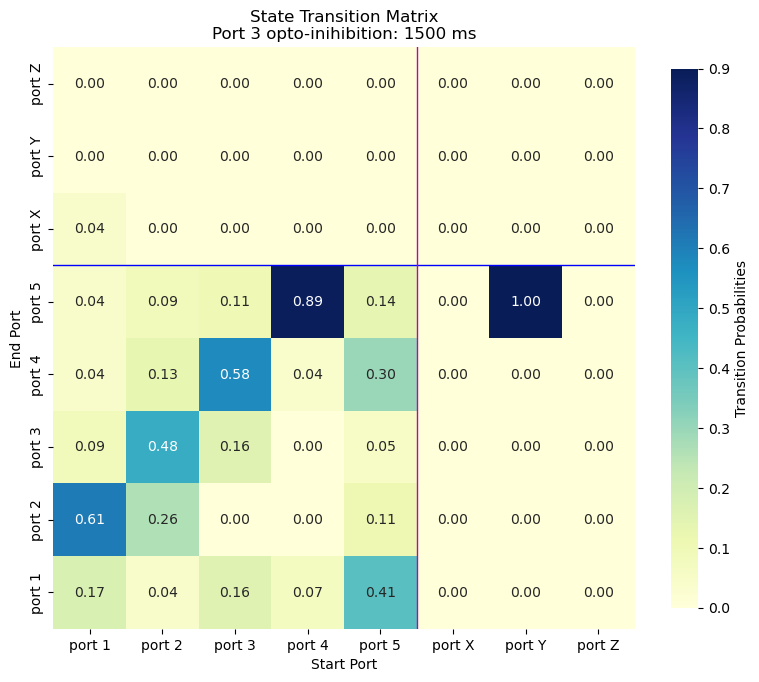

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_transition_matrix(optostim_port_3, normalize=True, display_numbers=True, limit_start_ports=False ,additional_title= 'Port 3 opto-inihibition: 1500 ms', ax=ax)
plt.show()

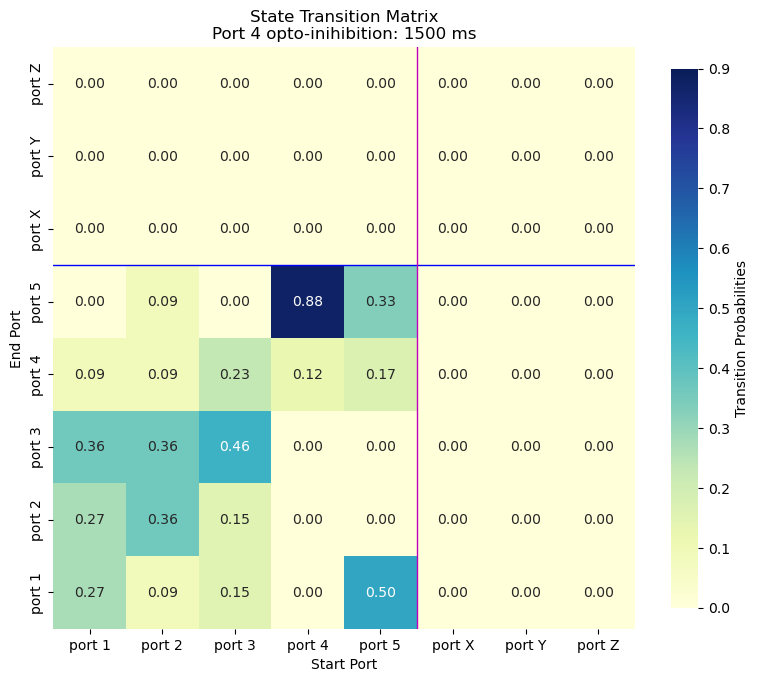

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_transition_matrix(optostim_port_4, normalize=True, display_numbers=True, limit_start_ports=False ,additional_title= 'Port 4 opto-inihibition: 1500 ms', ax=ax)
plt.show()

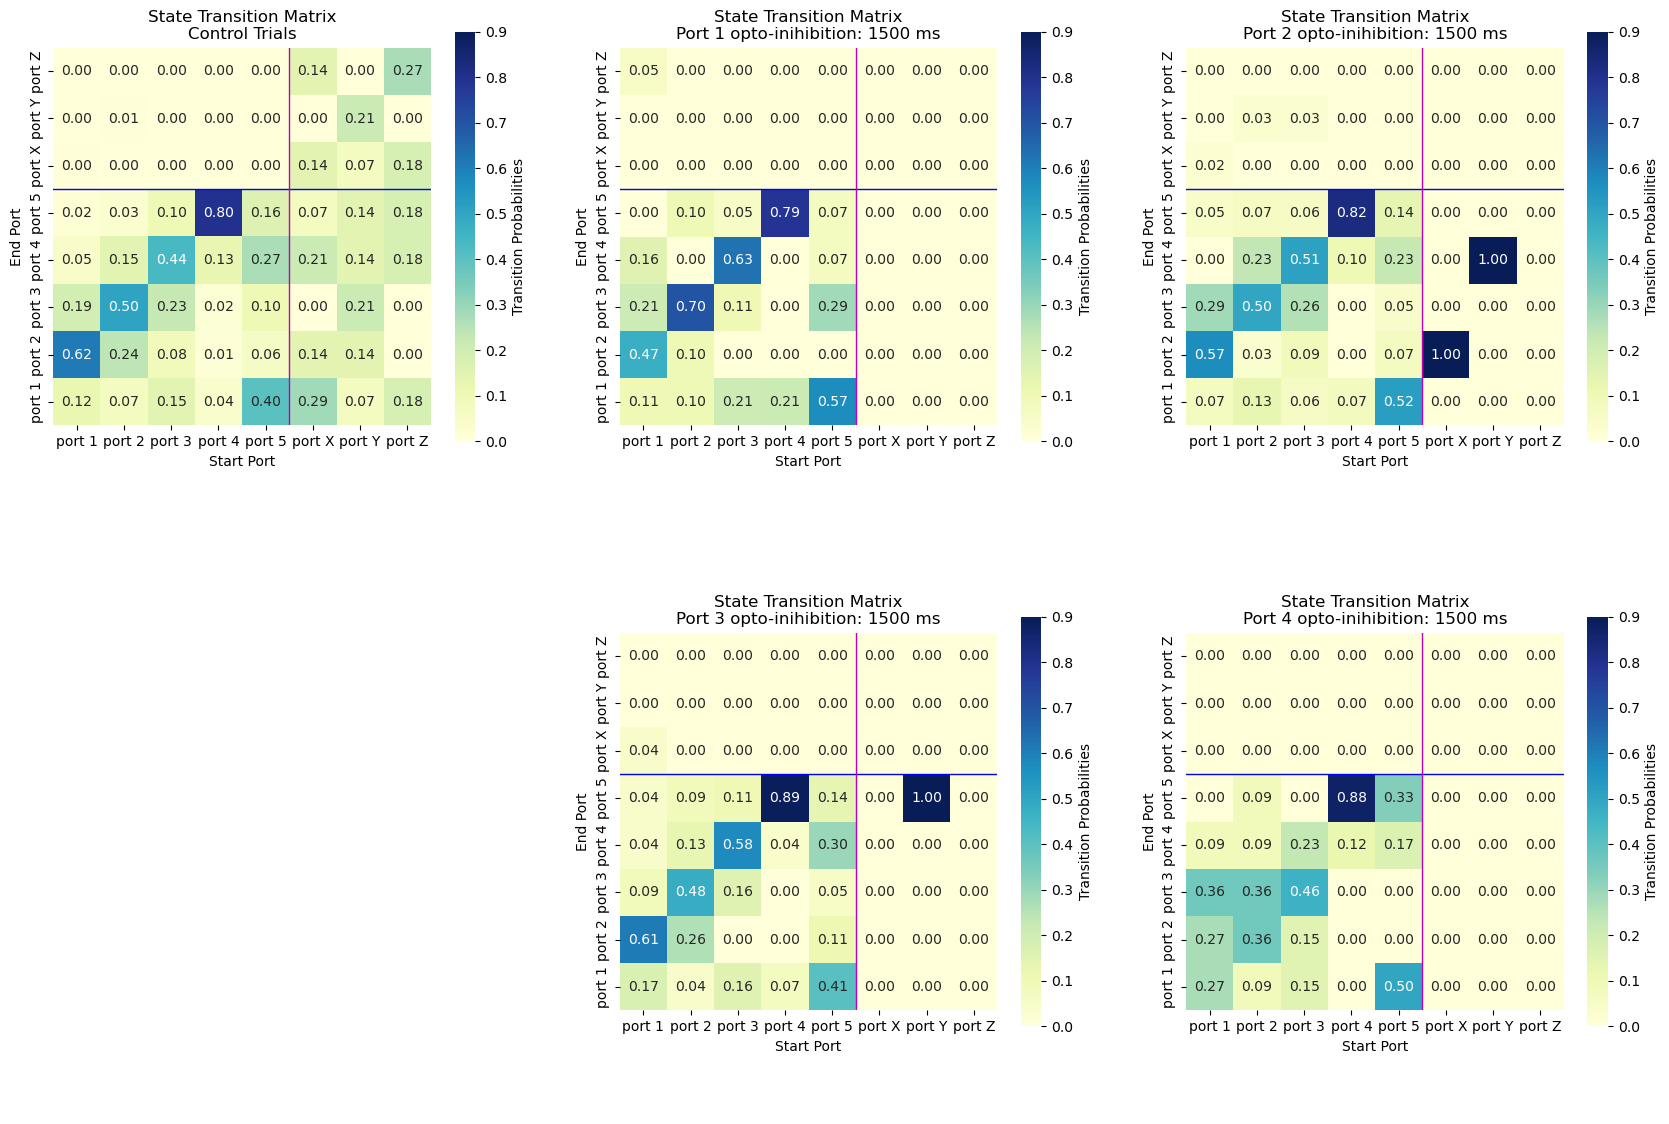

In [37]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

plot_transition_matrix(control_df, normalize=True, display_numbers=True, limit_start_ports=False, additional_title= 'Control Trials', ax=axs[0, 0])
plot_transition_matrix(optostim_port_1, normalize=True, display_numbers=True, limit_start_ports=False, additional_title= 'Port 1 opto-inihibition: 1500 ms', ax=axs[0, 1])
plot_transition_matrix(optostim_port_2, normalize=True, display_numbers=True, limit_start_ports=False, additional_title= 'Port 2 opto-inihibition: 1500 ms', ax=axs[0, 2])
plot_transition_matrix(optostim_port_3, normalize=True, display_numbers=True, limit_start_ports=False, additional_title= 'Port 3 opto-inihibition: 1500 ms', ax=axs[1, 1])
plot_transition_matrix(optostim_port_4, normalize=True, display_numbers=True, limit_start_ports=False, additional_title= 'Port 4 opto-inihibition: 1500 ms', ax=axs[1, 2])

# You can hide the unused subplot with this line
axs[1, 0].axis('off')

# Adjust spaces between subplots and around the plot
fig.tight_layout()
fig.subplots_adjust(left=0.1, wspace=0.2, hspace=0) # You can adjust this value as needed
plt.show()

In [38]:
# control_df.head()

In [39]:
def compute_transition_matrix(df, normalize=False):
    """
    Computes the transition matrix from the given dataframe.

    Args:
        df (pandas.DataFrame): The dataframe containing the transition data.
        normalize (bool): Whether to normalize the transition matrix to get transition probabilities.

    Returns:
        numpy.ndarray: The transition matrix.
    """

    # Create a copy of df
    df_copy = df.copy()

    # Mapping dictionary
    port_mapping = {2: 'port 1', 1: 'port 2', 6: 'port 3', 3: 'port 4', 7: 'port 5',
                    4: 'port X', 5: 'port Y', 8: 'port Z'}

    # Apply mapping to start_poke_port and end_poke_port
    df_copy['start_poke_port'] = df_copy['start_poke_port'].map(port_mapping)
    df_copy['end_poke_port'] = df_copy['end_poke_port'].map(port_mapping)

    # Group by start and end port and count the number of each transition
    transition_matrix = df_copy.groupby(['start_poke_port', 'end_poke_port']).size().unstack(fill_value=0)

    # Convert to numpy array for easier manipulation and replace np.nan with 0
    transition_matrix = np.nan_to_num(transition_matrix.values)

    if normalize:
        # Normalize across rows to get transition probabilities
        row_sums = transition_matrix.sum(axis=0, keepdims=True)
        row_sums[row_sums == 0] = 1e-10  # replace 0 sums with a small number to avoid division by zero
        transition_matrix = transition_matrix / row_sums
    print('in this transition matrix, the rows are the start ports and the columns are the end ports')
    return transition_matrix

in this transition matrix, the rows are the start ports and the columns are the end ports
Sum of each row:
 [1. 1. 1. 1. 1. 1. 1. 1.]


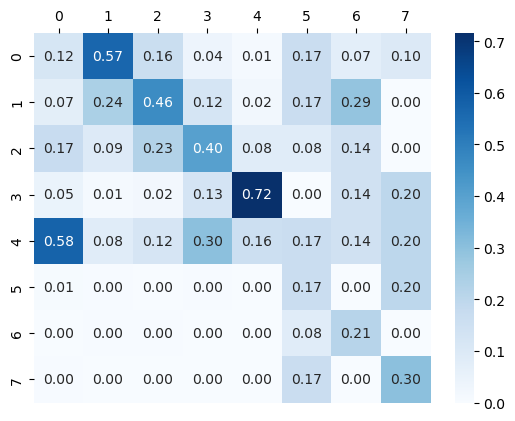

In [40]:
# plot transition matrix

transition_matrix = compute_transition_matrix(control_df, normalize=True)
transition_matrix
type(transition_matrix)
# Sum across row (i.e., sum all values in each row)
row_sums = transition_matrix.sum(axis=0)

# Print the result
print("Sum of each row:\n", row_sums)
# print(transition_matrix
# plot transition matrix

sns.heatmap(transition_matrix, cmap='Blues', annot=True, fmt='.2f')
# position x-axis on top
plt.gca().xaxis.tick_top()

In [41]:
# copy_df = trial_df.copy().reset_index()
# copy_df['2s_time_filter_out_in'].iloc[4] = 0
# copy_df['2s_time_filter_out_in']

# split trial_df into trial_df_1, trial_df_2, at rows where 2s_time_filter_out_in is False

def split_dataframe(df, column):
    """
    Splits the given DataFrame into multiple DataFrames based on the specified column.
    The DataFrame is split whenever the specified column has a False value.

    Args:
    df (pandas.DataFrame): The DataFrame to be split.
    column (str): The name of the column based on which the DataFrame will be split.

    Returns:
    list: A list containing the resulting DataFrames.
    """

    # Initialize an empty list to store the resulting DataFrames
    df_list = []

    # Initialize an empty DataFrame for the first segment
    df_segment = pd.DataFrame()

    # Iterate over the rows of the input DataFrame
    for index, row in df.iterrows():

        # If the current row in the specified column is True, 
        # add the row to the current segment
        if row[column]:
            df_segment = pd.concat([df_segment, pd.DataFrame(row).T])
        # If the current row in the specified column is False,
        # append the current segment to df_list and start a new segment
        else:
            df_list.append(df_segment)
            df_segment = pd.DataFrame()
            df_segment = pd.concat([df_segment, pd.DataFrame(row).T])

    # If the last segment is not empty, append it to df_list
    if not df_segment.empty:
        df_list.append(df_segment)

    # Return the list of DataFrames
    return df_list

# df_list = split_dataframe(copy_df, '2s_time_filter_out_in')



In [42]:
def generate_transition_lists():
    """
    Generate lists of correct, error, and neutral transitions. 

    Correct transitions follow the sequence 2 -> 1 -> 6 -> 3 -> 7 -> 2, 
    Neutral transitions are those where the start and end ports are the same or transitions to irrelevant ports [4, 5, 8],
    Error transitions are all others.
    
    Returns:
    correct_transitions (list): List of correct transitions.
    error_transitions (list): List of error transitions.
    neutral_transitions (list): List of neutral transitions.
    """

    # Generate all possible transitions from 1-8 to 1-8
    all_transitions = [10*i + j for i in range(1, 9) for j in range(1, 9)]

    # Define the correct sequence
    correct_sequence = [2, 1, 6, 3, 7, 2]

    # Generate correct transitions based on the correct sequence
    correct_transitions = [10*correct_sequence[i] + correct_sequence[i+1] for i in range(len(correct_sequence)-1)]
    # The sequence wraps around, so manually add the last transition to complete the cycle
    correct_transitions.append(72)

    # Generate neutral transitions
    # Neutral transitions start and end at the same port
    same_port_transitions = [11*i for i in range(1, 9)]
    # Neutral transitions also include transitions to irrelevant ports (4, 5, 8)
    irrelevant_port_transitions = [10*i + j for i in [4, 5, 8] for j in range(1, 9)]
    neutral_transitions = same_port_transitions + irrelevant_port_transitions

    # Generate error transitions
    # Error transitions are all others that are not correct or neutral
    error_transitions = list(set(all_transitions) - set(correct_transitions) - set(neutral_transitions))

    return correct_transitions, error_transitions, neutral_transitions

# Call the function to get the transition lists
correct_transitions, error_transitions, neutral_transitions = generate_transition_lists()


def get_repeat_transitions(df):
    """
    Creates a new column 'is_repeat' to indicate if the transition is a repeat.
    A repeat transition is defined as a transition where the start and end ports are the same.

    Args:
    df (pandas.DataFrame): The DataFrame with the transitions data. 
                           The DataFrame should have 'start_poke_port' and 'end_poke_port' columns.

    Returns:
    pandas.Series: A Series with True for repeat transitions and False for others.
    """
    return df['start_poke_port'] == df['end_poke_port']


def get_transition_labels(df):
    """
    Creates a new column 'transition_label' to classify the transition.
    Transitions are classified as 'correct', 'neutral', or 'error' based on predefined lists.
    'correct' transitions are those where 'transition_type' is in the correct_transitions list.
    'neutral' transitions are those where 'transition_type' is in the neutral_transitions list.
    'error' transitions are those where 'transition_type' is in the error_transitions list.

    Args:
    df (pandas.DataFrame): The DataFrame with the transitions data.
                           The DataFrame should have 'transition_type' column.

    Returns:
    pandas.Series: A Series with the transition classification.
    """
    correct_transitions = [21,16,63,37,72]
    error_transitions = [23,24,25,26,27,28,12,13,14,15,17,18,61,62,64,65,67,68,31,32,34,35,36,38]
    neutral_transitions = [11,22,33,66,41,42,43,44,45,46,47,48,51,52,53,54,55,56,57,58,71,73,74,75,76,77,78,81,82,83,84,85,86,87,88]

    transition_labels = pd.Series(['error'] * len(df), index=df.index)

    mask_correct = df['transition_type'].isin(correct_transitions)
    transition_labels[mask_correct] = 'correct'

    mask_neutral = df['transition_type'].isin(neutral_transitions)
    transition_labels[mask_neutral] = 'neutral'

    return transition_labels

In [43]:
# create the sequence performend by the mouse in the chosen trial

perfect_sequence = '21637'
start_port = perfect_sequence[0]

def get_sequence_info(df):
    """
    This function extracts the start poke port from the dataframe and returns it as a string, 
    and the in-in latency as a list of numerical values.

    Args:
    df (pandas.DataFrame): The DataFrame with the transitions data. 
                           The DataFrame should have 'start_poke_port' and 'in_in_latency' columns.

    Returns:
    str, list: The first output is a string that contains the 'start_poke_port' values 
               and the second output is a list that contains the 'in_in_latency' numerical values.
    """
    # Convert 'start_poke_port' to string and join all elements into a single string
    start_poke_ports = ''.join(map(str, df['start_poke_port'].tolist()))

    # convert 'end_poke_port' to string and join all elements into a single string
    end_poke_ports = ''.join(map(str, df['end_poke_port'].tolist()))
    
    # Keep 'in_in_latency' as a list of floats
    in_in_latencies = df['in_in_latency'].tolist()

    # Keep 'out_in_latency' as a list of floats
    out_in_latencies = df['out_in_latency'].tolist()

    return start_poke_ports, end_poke_ports, in_in_latencies, out_in_latencies

### analysis for transition times

In [44]:
# find all sequences from a dataframe arranged according to their cumulative_trial_ids

# get all unique cumulative_trial_ids

cumulative_trial_ids = control_df['cumulative_trial_id'].unique()
cumulative_trial_ids.sort()
# cumulative_trial_ids
# access the dataframe at any cumulative trial id

# trial_df = control_df[control_df['cumulative_trial_id'] == cumulative_trial_ids[0]].reset_index(drop=True)
# trial_df.head()

In [45]:
# # print(trial_df)

# trial_ids = trial_df['trial_id'].values
# transition_type = trial_df['transition_type'].values
# start_poke_port = trial_df['start_poke_port'].values
# end_poke_port = trial_df['end_poke_port'].values
# start_poke_in_timestamp = trial_df['start_poke_in_timestamp'].values
# start_poke_out_timestamp = trial_df['start_poke_out_timestamp'].values
# end_poke_in_timestamp = trial_df['end_poke_in_timestamp'].values
# end_poke_out_timestamp = trial_df['end_poke_out_timestamp'].values
# in_in_latency = trial_df['in_in_latency'].values
# out_in_latency = trial_df['out_in_latency'].values


# print('Trial ids', trial_ids)
# print('Transitions', transition_type)
# print('Start poke port', start_poke_port)
# print('End poke port', end_poke_port)
# print('Start poke in time stamp', start_poke_in_timestamp)
# print('Start poke out time stamp', start_poke_out_timestamp)
# print('End poke in time stamp', end_poke_in_timestamp)
# print('End poke out time stamp', end_poke_out_timestamp)
# print('In-in latency', in_in_latency)
# print('Out-in latency', out_in_latency)


In [46]:
# start_poke_ports, end_poke_ports, in_in_latencies, out_in_latencies = get_sequence_info(trial_df)
# print('start_poke_ports', start_poke_ports)
# print('end_poke_ports', end_poke_ports)
# print('in_in_latencies', in_in_latencies)
# print('out_in_latencies', out_in_latencies)   
# print('perfect sequence', perfect_sequence) 


In [47]:

def filter_dataframe(df, filter_sequence_from_start_port=True):
    """
    This function filters a given dataframe based on specific conditions and returns a new dataframe.

    Parameters:
    df (pandas.DataFrame): Input DataFrame to be filtered.
    filter_sequence_from_start_port (bool): If True, the function filters rows that occur at or after the first occurrence of 2.
        If False, the function sets trial_start_index to the first start_poke_port.

    Returns:
    pandas.DataFrame: The filtered DataFrame.
    """

    # Get all unique cumulative_trial_ids and sort them
    unique_trial_ids = df['cumulative_trial_id'].unique()
    unique_trial_ids.sort()

    # List to store the updated rows
    filtered_rows = []

    for trial_id in unique_trial_ids:
        # Filter DataFrame for specific trial
        trial_df = df[df['cumulative_trial_id'] == trial_id].copy()

        # Find the index of first occurrence based on filter_sequence_from_start_port
        if filter_sequence_from_start_port:
            # Find the index of first occurrence of 2 in start_poke_port
            trial_start_index = trial_df[trial_df['start_poke_port'] == 2].index.min()

            # if pd.isna(trial_start_index):
            #     # If there's no 2 in start_poke_port for the trial, just continue to the next trial
            #     continue
        else:
            # Set trial_start_index to the first start_poke_port
            trial_start_index = trial_df.index.min()
        
        # If there's no valid trial_start_index for the trial, just continue to the next trial
        if pd.isna(trial_start_index):
            continue

        # Filter rows that occur at or after the trial_start_index
        updated_trial_df = trial_df.loc[trial_start_index:].copy()

        # Set reference timestamp
        reference_timestamp = updated_trial_df.loc[trial_start_index, 'start_poke_in_timestamp']

        # Calculate latency to start trial
        latency_to_start_trial = reference_timestamp - trial_df['start_poke_in_timestamp'].iloc[0]

        # Update timestamp columns and create lists
        for timestamp_column in ['start_poke_in_timestamp', 'start_poke_out_timestamp', 
                                 'end_poke_in_timestamp', 'end_poke_out_timestamp']:
            updated_trial_df[timestamp_column] = list(updated_trial_df[timestamp_column] - reference_timestamp)

        # Calculate new in_in_latency and out_in_latency and create lists
        updated_trial_df['in_in_latency'] = list(updated_trial_df['end_poke_in_timestamp'] - updated_trial_df['start_poke_in_timestamp'])
        updated_trial_df['out_in_latency'] = list(updated_trial_df['end_poke_in_timestamp'] - updated_trial_df['start_poke_out_timestamp'])

        # Condense the updated trial DataFrame to one row
        condensed_row = updated_trial_df.iloc[0]
        array_columns = ['transition_type', 'start_poke_port', 'end_poke_port', 
                         'start_poke_in_timestamp', 'start_poke_out_timestamp', 
                         'end_poke_in_timestamp', 'end_poke_out_timestamp', 
                         'out_in_latency', 'in_in_latency', 'repeat_filter', 
                         '2s_time_filter_out_in', '2s_time_filter_in_in', 
                         'opto_condition', 'opto_stimulated_port', 'training_level']
        for column in array_columns:
            condensed_row[column] = np.array(updated_trial_df[column])

        condensed_row['latency_to_start_trial'] = latency_to_start_trial

        # Append condensed row to the filtered DataFrame
        filtered_rows.append(condensed_row)

    # Convert list of rows to DataFrame
    filtered_df = pd.concat(filtered_rows, axis=1).transpose()

    # Reset index of the new DataFrame
    filtered_df.reset_index(drop=True, inplace=True)

    # Drop unnecessary columns
    filtered_df.drop(['led_intensities_ports_2_3_4_5', 'reward_amounts_ports_1_2_3_4'], axis=1, inplace=True)

    return filtered_df

# Usage:
filtered_control_df = filter_dataframe(control_df, filter_sequence_from_start_port=True)

In [48]:
filtered_control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                339 non-null    object
 1   trial_id                  339 non-null    object
 2   transition_type           339 non-null    object
 3   start_poke_port           339 non-null    object
 4   end_poke_port             339 non-null    object
 5   start_poke_in_timestamp   339 non-null    object
 6   start_poke_out_timestamp  339 non-null    object
 7   end_poke_in_timestamp     339 non-null    object
 8   end_poke_out_timestamp    339 non-null    object
 9   out_in_latency            339 non-null    object
 10  in_in_latency             339 non-null    object
 11  repeat_filter             339 non-null    object
 12  2s_time_filter_out_in     339 non-null    object
 13  2s_time_filter_in_in      339 non-null    object
 14  opto_condition            

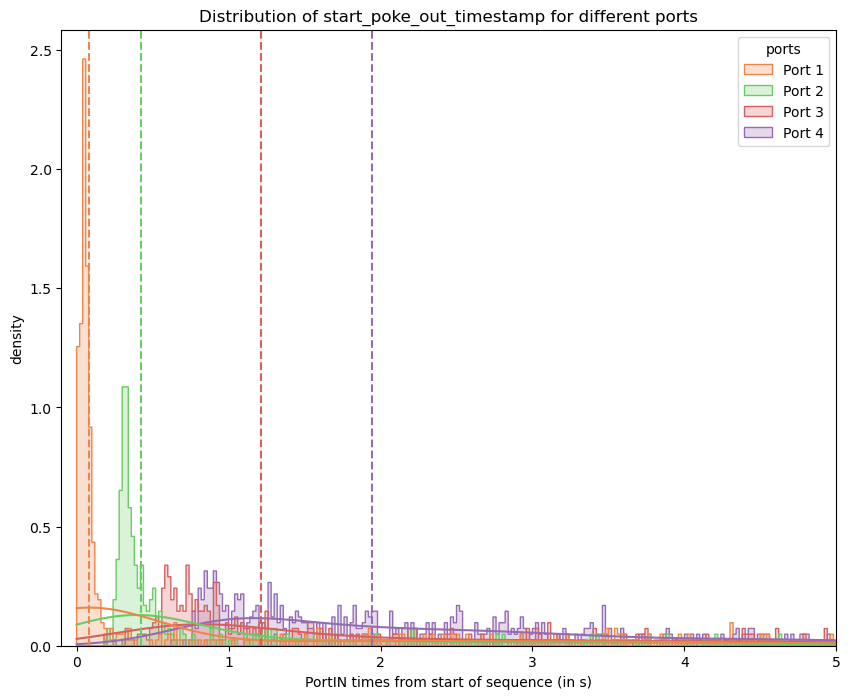

In [49]:
def plot_timestamp_distribution(df, timestamps, x_range=(0, 5), binwidth=0.02, stat = 'density', exclude_ports=[], ax=None):
    """
    This function plots the distribution of timestamps for different ports.

    Parameters:
    df (pandas.DataFrame): Input DataFrame which contains timestamps and port information.
    timestamps (str): The column name in df for the timestamp data to plot.
    x_range (tuple): The range of x values to display in the plot.
    exclude_ports (list): List of ports to exclude from the plot.
    ax (matplotlib.axes.Axes): Axes object to draw the plot onto.
    """
    # List to hold latency data for different ports
    latency_data = []
    # Label each port
    port_labels = {2: 'Port 1', 1: 'Port 2',
                           6: 'Port 3', 3: 'Port 4',
                           7: 'Port 5', 4: 'Other ports',
                           5: 'Other ports', 8: 'Other ports'}

    for row in df.itertuples(index=False):
        for port, latency in zip(row.start_poke_port, getattr(row, timestamps)):
            if port in port_labels.keys() and port not in exclude_ports:
                latency_data.append((latency, port_labels[port]))

    # Convert the list to a DataFrame
    latency_df = pd.DataFrame(latency_data, columns=[timestamps, 'ports'])

    # If no Axes object provided, create one
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))

    # Use a color palette
    full_palette = sns.color_palette("muted", len(latency_df['ports'].unique()) + 1)  # Added 1 for starting from the second color
    palette_colors = full_palette[1:] 

    # Plot the distribution of timestamps for each ports
    hist_plot = sns.histplot(latency_df, x=timestamps, binwidth=binwidth, hue='ports', element="step", stat=stat, kde= True, palette=palette_colors, ax=ax)

    # Set the limits of x-axis to 'zoom' in
    ax.set_xlim(x_range) 

    # Set the title and labels
    ax.set_title(f'Distribution of {timestamps} for different ports')
    ax.set_xlabel('Transition time (in s)')
    ax.set_ylabel(stat)

    # Add vertical lines at the median value of each distribution
    for port in latency_df['ports'].unique():
        median_latency = latency_df[latency_df['ports'] == port][timestamps].median()
        ax.axvline(median_latency, linestyle='--', color=palette_colors[latency_df['ports'].unique().tolist().index(port)])

    # Check if there are handles and labels for which a legend can be created
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        # Set the title for the legend
        legend = ax.legend()
        if legend.texts:
            legend.texts[0].set_text('Transitions')

    return ax


ax = plot_timestamp_distribution(filtered_control_df, 'start_poke_out_timestamp', x_range=(-0.1,5), exclude_ports=[7, 4, 5, 8])
ax.set_xlabel('PortIN times from start of sequence (in s)')
plt.show()


In [50]:
# filtered_control_df already exists
filtered_optostim_port_1 = filter_dataframe(optostim_port_1, filter_sequence_from_start_port= True)
filtered_optostim_port_2 = filter_dataframe(optostim_port_2, filter_sequence_from_start_port= True)
filtered_optostim_port_3 = filter_dataframe(optostim_port_3, filter_sequence_from_start_port= True)
filtered_optostim_port_4 = filter_dataframe(optostim_port_4, filter_sequence_from_start_port= True)

### Plot the distribution of port_in_times 

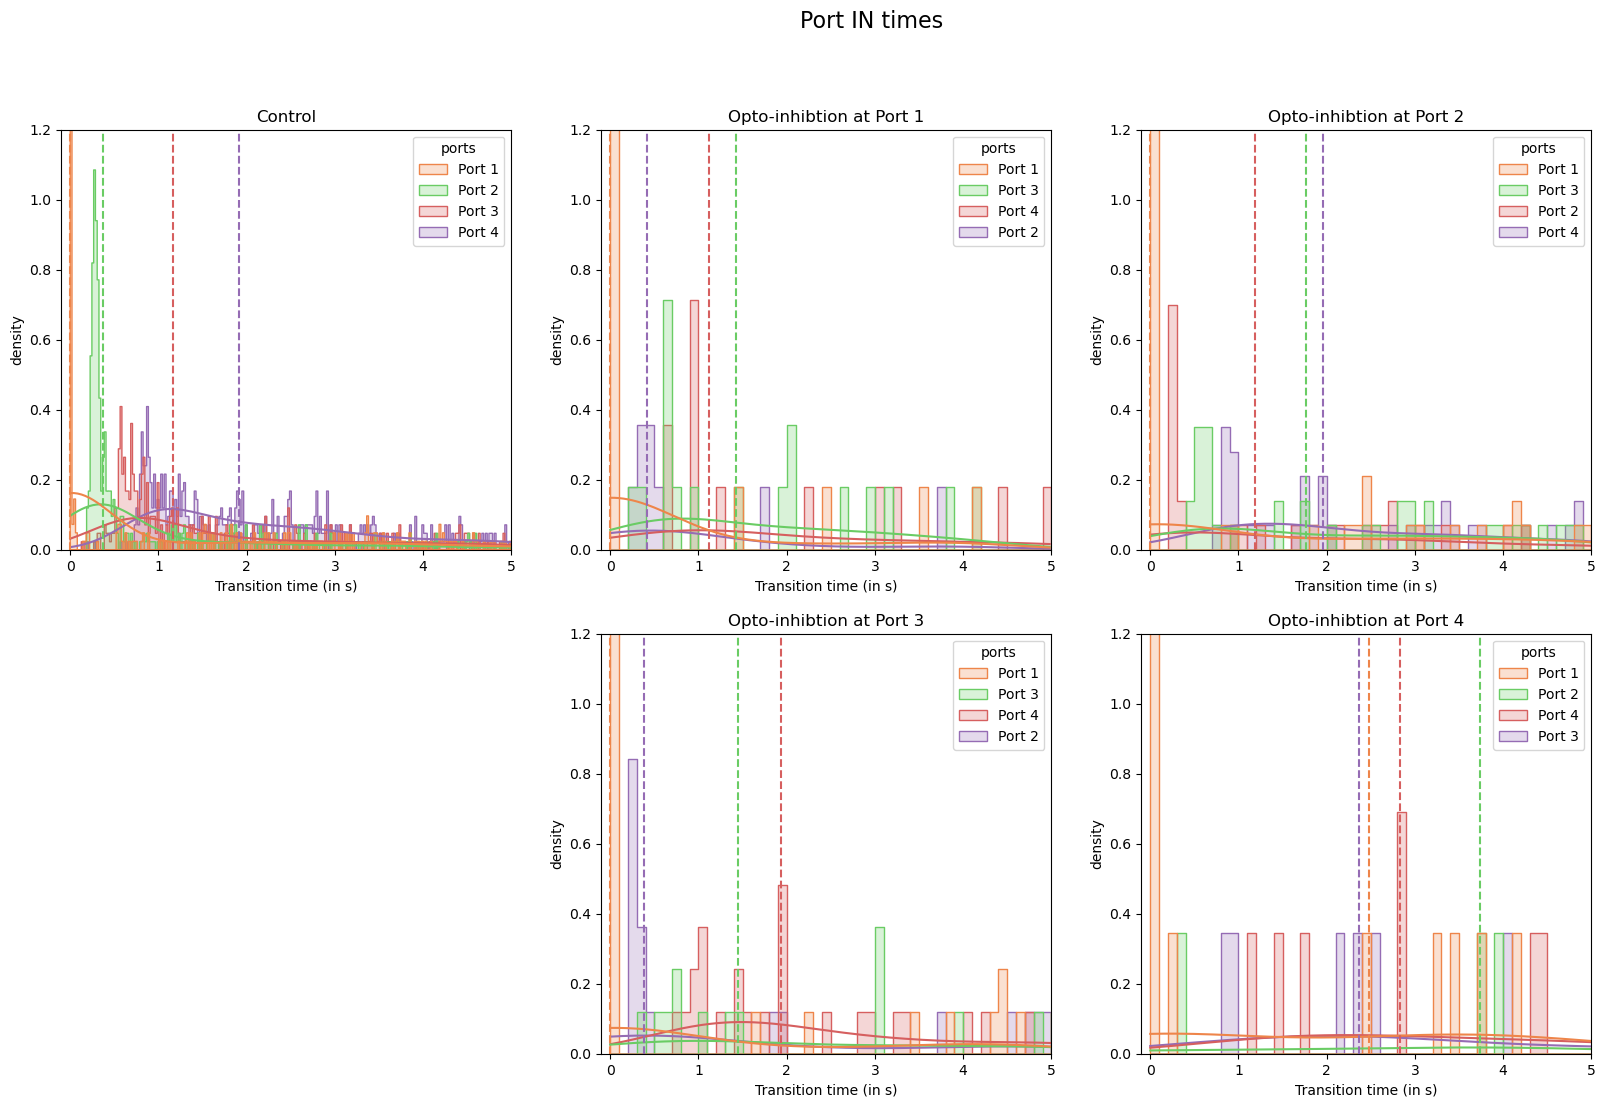

In [51]:
# fetch all opto data

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

plot_timestamp_distribution(filtered_control_df, 'start_poke_in_timestamp', x_range=(-0.1,5), binwidth=0.02, stat = 'density', exclude_ports=[7, 4, 5, 8], ax = axs[0, 0])
plot_timestamp_distribution(filtered_optostim_port_1, 'start_poke_in_timestamp', x_range=(-0.1,5), binwidth=0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], ax = axs[0, 1])
plot_timestamp_distribution(filtered_optostim_port_2, 'start_poke_in_timestamp', x_range=(-0.1,5), binwidth=0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], ax= axs[0, 2])
plot_timestamp_distribution(filtered_optostim_port_3, 'start_poke_in_timestamp', x_range=(-0.1,5), binwidth=0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], ax = axs[1, 1])
plot_timestamp_distribution(filtered_optostim_port_4, 'start_poke_in_timestamp', x_range=(-0.1,5), binwidth=0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], ax = axs[1, 2])

# You can hide the unused subplot with this line
axs[1, 0].axis('off')

# set optional titles
axs[0, 0].set_title('Control')
axs[0, 1].set_title('Opto-inhibtion at Port 1')
axs[0, 2].set_title('Opto-inhibtion at Port 2')
axs[1, 1].set_title('Opto-inhibtion at Port 3')
axs[1, 2].set_title('Opto-inhibtion at Port 4')

# set optional y-axis limits
axs[0, 0].set_ylim(0, 1.2)
axs[0, 1].set_ylim(0, 1.2)
axs[0, 2].set_ylim(0, 1.2)
axs[1, 1].set_ylim(0, 1.2)
axs[1, 2].set_ylim(0, 1.2)

# Adjust spaces between subplots and around the plot
# fig.tight_layout()
fig.subplots_adjust(left=0.05) # You can adjust this value as needed

# Add main title for the figure
plt.suptitle("Port IN times", fontsize=16)
plt.show()

### Plot the distribution of port_out_times

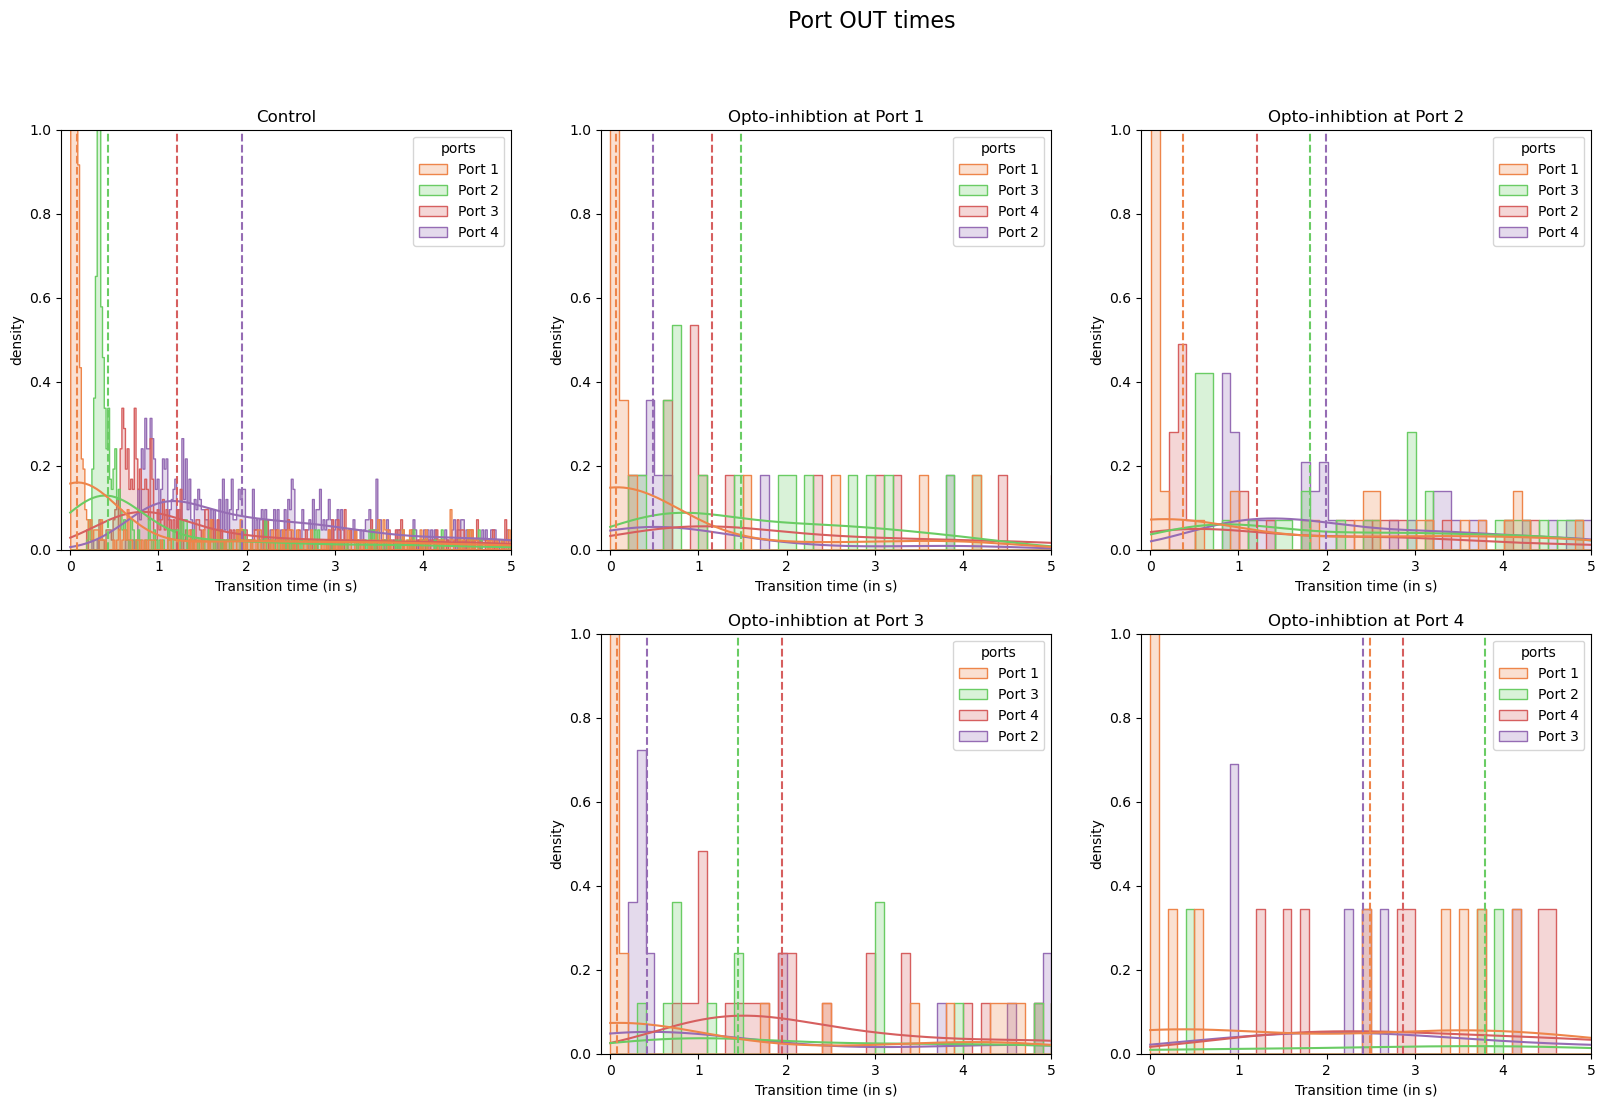

In [52]:
# fetch all opto data

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

plot_timestamp_distribution(filtered_control_df, 'start_poke_out_timestamp', x_range=(-0.1,5), binwidth=0.02, stat = 'density', exclude_ports=[7, 4, 5, 8], ax = axs[0, 0])
plot_timestamp_distribution(filtered_optostim_port_1, 'start_poke_out_timestamp', x_range=(-0.1,5), binwidth=0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], ax = axs[0, 1])
plot_timestamp_distribution(filtered_optostim_port_2, 'start_poke_out_timestamp', x_range=(-0.1,5), binwidth=0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], ax= axs[0, 2])
plot_timestamp_distribution(filtered_optostim_port_3, 'start_poke_out_timestamp', x_range=(-0.1,5), binwidth=0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], ax = axs[1, 1])
plot_timestamp_distribution(filtered_optostim_port_4, 'start_poke_out_timestamp', x_range=(-0.1,5), binwidth=0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], ax = axs[1, 2])

# You can hide the unused subplot with this line
axs[1, 0].axis('off')

# set optional titles
axs[0, 0].set_title('Control')
axs[0, 1].set_title('Opto-inhibtion at Port 1')
axs[0, 2].set_title('Opto-inhibtion at Port 2')
axs[1, 1].set_title('Opto-inhibtion at Port 3')
axs[1, 2].set_title('Opto-inhibtion at Port 4')

# set optional y-axis limits
axs[0, 0].set_ylim(0, 1)
axs[0, 1].set_ylim(0, 1)
axs[0, 2].set_ylim(0, 1)
axs[1, 1].set_ylim(0, 1)
axs[1, 2].set_ylim(0, 1)

# Adjust spaces between subplots and around the plot
# fig.tight_layout()
fig.subplots_adjust(left=0.05) # You can adjust this value as needed

# Add main title for the figure
plt.suptitle("Port OUT times", fontsize=16)
plt.show()

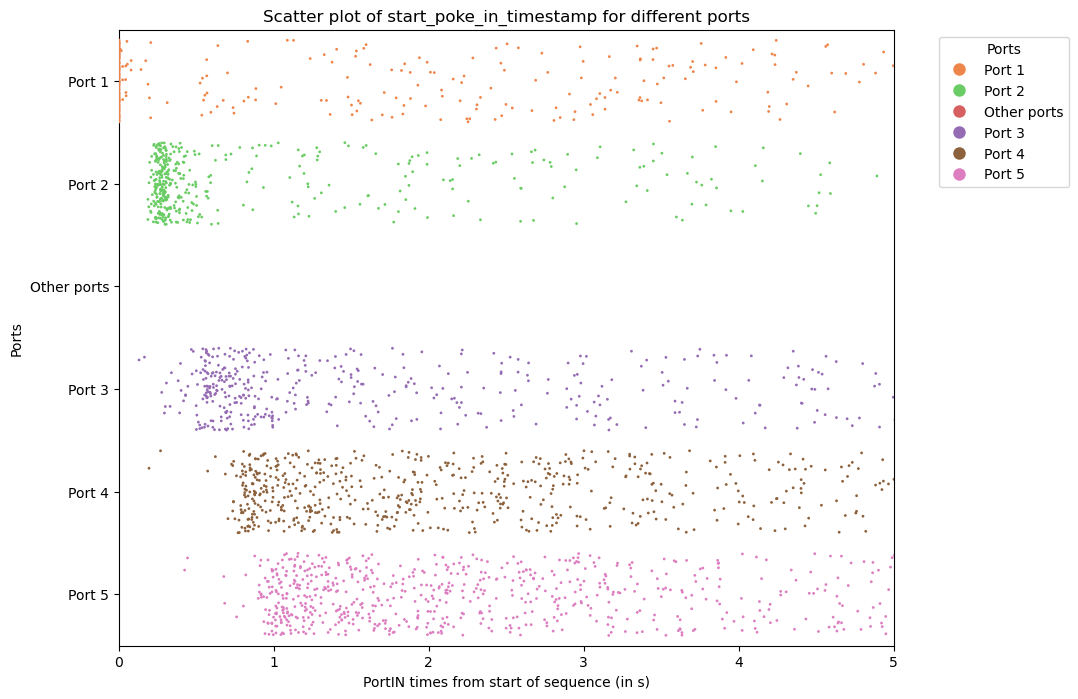

In [53]:
def plot_timestamp_strip(df, timestamps, x_range=(0, 5), exclude_ports=[], ax=None):
    """
    This function plots a scatter plot of timestamps for different ports.

    Parameters:
    df (pandas.DataFrame): Input DataFrame which contains timestamps and port information.
    timestamps (str): The column name in df for the timestamp data to plot.
    x_range (tuple): The range of x values to display in the plot.
    exclude_ports (list): List of ports to exclude from the plot.
    ax (matplotlib.axes.Axes): Axes object to draw the plot onto.
    """

    # List to hold latency data for different ports
    latency_data = []
    # Label each port
    port_labels = {2: 'Port 1', 1: 'Port 2',
                           6: 'Port 3', 3: 'Port 4',
                           7: 'Port 5', 4: 'Other ports',
                           5: 'Other ports', 8: 'Other ports'}

    for row in df.itertuples(index=False):
        for port, latency in zip(row.start_poke_port, getattr(row, timestamps)):
            if port in port_labels.keys() and port not in exclude_ports:
                latency_data.append((latency, port_labels[port]))

    # Convert the list to a DataFrame
    latency_df = pd.DataFrame(latency_data, columns=[timestamps, 'ports'])

    # If no Axes object provided, create one
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))

    # Use a color palette
    full_palette = sns.color_palette("muted", 10)
    palette_colors = full_palette[1:] # start from the third color

    # Generate a color dictionary based on the order of unique ports in the data
    color_dict = {port: palette_colors[i % len(palette_colors)] for i, port in enumerate(latency_df['ports'].unique())}

    # Plot the scatter plot of timestamps for each ports
    strip_plot = sns.stripplot(x=timestamps, y='ports', data=latency_df, size=2, jitter=0.4, palette=color_dict, hue='ports', ax=ax)

    # Set the limits of x-axis to 'zoom' in
    ax.set_xlim(x_range) 

    # Set the title and labels
    ax.set_title(f'Scatter plot of {timestamps} for different ports')
    ax.set_xlabel('Transition time (in s)')
    ax.set_ylabel('Ports')

    # Create legend with color patches
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=port,
                              markerfacecolor=color_dict[port], markersize=10) for port in latency_df['ports'].unique()]

    # Add legend to the plot
    ax.legend(handles=legend_elements, title="Ports", bbox_to_anchor=(1.05, 1), loc='upper left')

    return ax

ax = plot_timestamp_strip(filtered_control_df, 'start_poke_in_timestamp', x_range=(0,5), exclude_ports=[])
ax.set_xlabel('PortIN times from start of sequence (in s)')
plt.show()

### strip plot for port_in_times

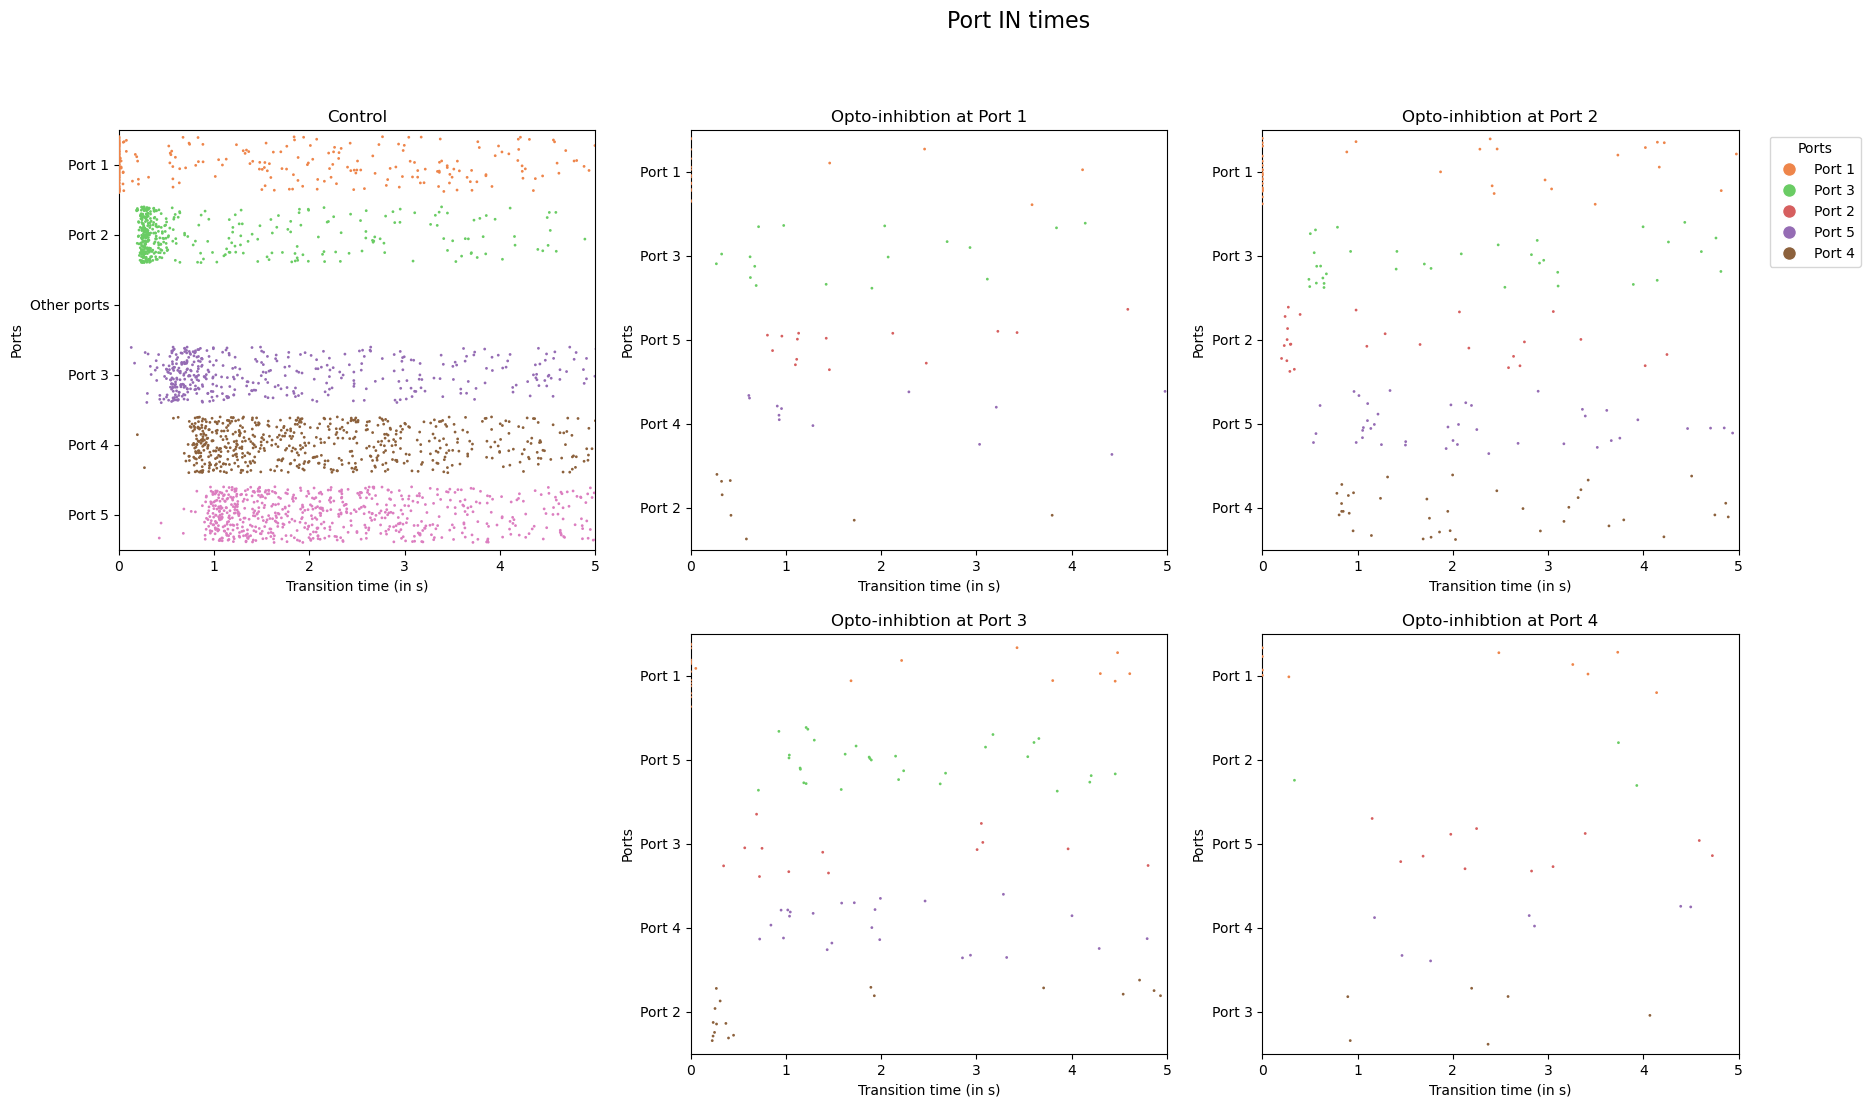

In [54]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

plot_timestamp_strip(filtered_control_df, 'start_poke_in_timestamp', x_range=(0,5), exclude_ports=[], ax = axs[0, 0])
plot_timestamp_strip(filtered_optostim_port_1, 'start_poke_in_timestamp', x_range=(0,5), exclude_ports=[], ax = axs[0, 1])
plot_timestamp_strip(filtered_optostim_port_2, 'start_poke_in_timestamp', x_range=(0,5), exclude_ports=[], ax= axs[0, 2])
plot_timestamp_strip(filtered_optostim_port_3, 'start_poke_in_timestamp', x_range=(0,5), exclude_ports=[], ax = axs[1, 1])
plot_timestamp_strip(filtered_optostim_port_4, 'start_poke_in_timestamp', x_range=(0,5), exclude_ports=[], ax = axs[1, 2])

# You can hide the unused subplot with this line
axs[1, 0].axis('off')

# switch off unneeded legends
axs[0, 0].legend_.remove()
axs[0, 1].legend_.remove()
axs[1, 1].legend_.remove()
axs[1, 2].legend_.remove()

# set optional titles
axs[0, 0].set_title('Control')
axs[0, 1].set_title('Opto-inhibtion at Port 1')
axs[0, 2].set_title('Opto-inhibtion at Port 2')
axs[1, 1].set_title('Opto-inhibtion at Port 3')
axs[1, 2].set_title('Opto-inhibtion at Port 4')

# Adjust spaces between subplots and around the plot
# fig.tight_layout()
fig.subplots_adjust(left=0.0) # You can adjust this value as needed

# Add main title for the figure
plt.suptitle("Port IN times", fontsize=16)
plt.show()

### strip plot for port_out_times

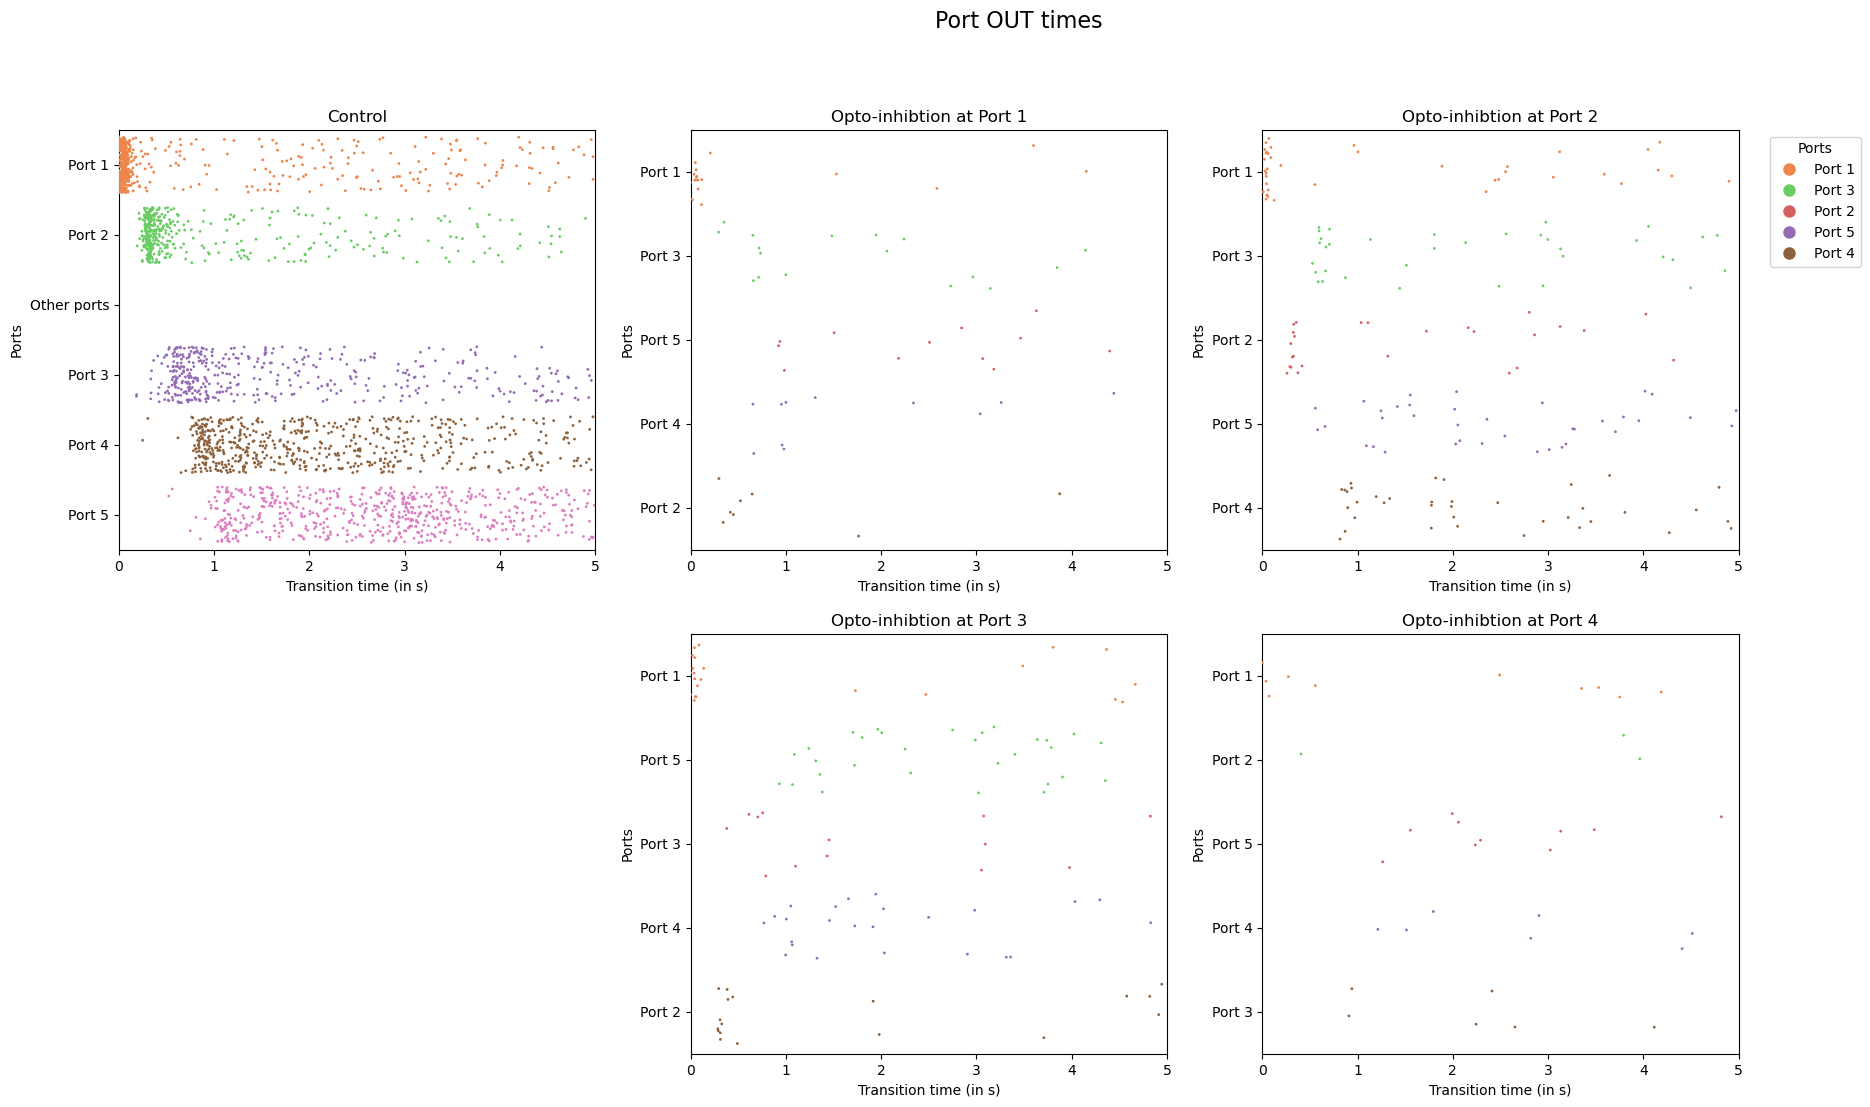

In [55]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

plot_timestamp_strip(filtered_control_df, 'start_poke_out_timestamp', x_range=(0,5), exclude_ports=[], ax = axs[0, 0])
plot_timestamp_strip(filtered_optostim_port_1, 'start_poke_out_timestamp', x_range=(0,5), exclude_ports=[], ax = axs[0, 1])
plot_timestamp_strip(filtered_optostim_port_2, 'start_poke_out_timestamp', x_range=(0,5), exclude_ports=[], ax= axs[0, 2])
plot_timestamp_strip(filtered_optostim_port_3, 'start_poke_out_timestamp', x_range=(0,5), exclude_ports=[], ax = axs[1, 1])
plot_timestamp_strip(filtered_optostim_port_4, 'start_poke_out_timestamp', x_range=(0,5), exclude_ports=[], ax = axs[1, 2])

# You can hide the unused subplot with this line
axs[1, 0].axis('off')

# switch off unneeded legends
axs[0, 0].legend_.remove()
axs[0, 1].legend_.remove()
axs[1, 1].legend_.remove()
axs[1, 2].legend_.remove()

# set optional titles
axs[0, 0].set_title('Control')
axs[0, 1].set_title('Opto-inhibtion at Port 1')
axs[0, 2].set_title('Opto-inhibtion at Port 2')
axs[1, 1].set_title('Opto-inhibtion at Port 3')
axs[1, 2].set_title('Opto-inhibtion at Port 4')

# Adjust spaces between subplots and around the plot
# fig.tight_layout()
fig.subplots_adjust(left=0.0) # You can adjust this value as needed

# Add main title for the figure
plt.suptitle("Port OUT times", fontsize=16)
plt.show()

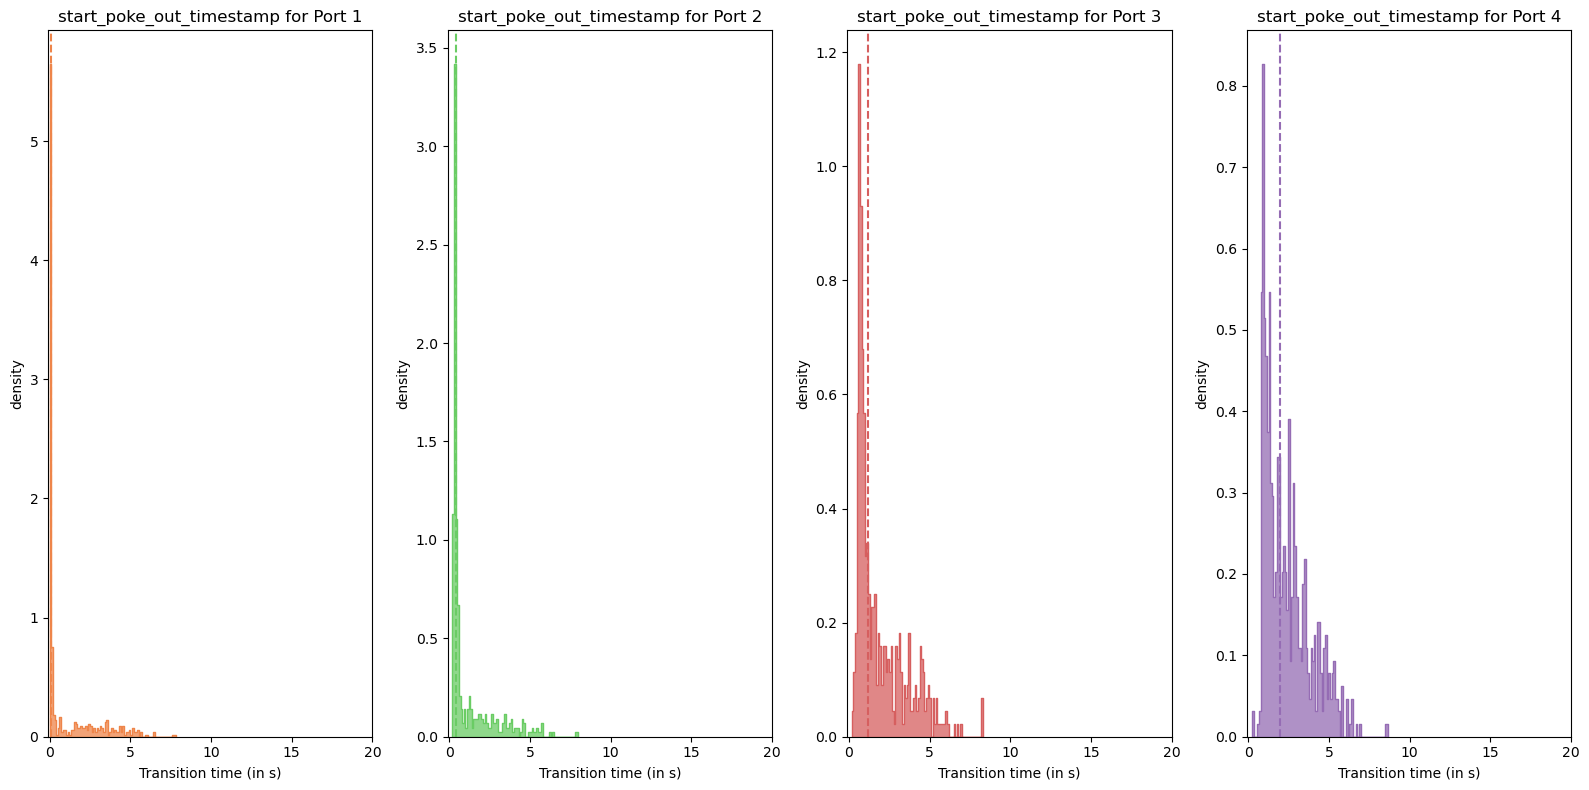

In [56]:
def plot_timestamp_distribution_subplots(df, timestamps, x_range=(0, 5), binwidth = 0.02, stat = 'density', exclude_ports=[], fig_size=(15, 8), axes=None):
    """
    This function plots the distribution of timestamps for different ports on separate subplots.

    Parameters:
    df (pandas.DataFrame): Input DataFrame which contains timestamps and port information.
    timestamps (str): The column name in df for the timestamp data to plot.
    x_range (tuple): The range of x values to display in the plot.
    exclude_ports (list): List of ports to exclude from the plot.
    fig_size (tuple): The size of the entire figure containing all subplots.
    """
    # List to hold latency data for different ports
    latency_data = []
    # Label each port
    port_labels = {2: 'Port 1', 1: 'Port 2',
                   6: 'Port 3', 3: 'Port 4',
                   7: 'Port 5', 4: 'Other ports',
                   5: 'Other ports', 8: 'Other ports'}

    for row in df.itertuples(index=False):
        for port, latency in zip(row.start_poke_port, getattr(row, timestamps)):
            if port in port_labels.keys() and port not in exclude_ports:
                latency_data.append((latency, port_labels[port]))

    # Convert the list to a DataFrame
    latency_df = pd.DataFrame(latency_data, columns=[timestamps, 'ports'])

    # Define a list of all possible ports
    possible_ports = ['Port 1', 'Port 2', 'Port 3', 'Port 4', 'Other ports']

    # Create a list of the ports in your data
    data_ports = latency_df['ports'].unique()

    # Create a new ordered_ports list that only includes ports in possible_ports that are also in your data
    ordered_ports = [port for port in possible_ports if port in data_ports]

    if axes is None:
        # Create a figure to hold the subplots
        fig, axes = plt.subplots(nrows=1, ncols=max(1, len(ordered_ports)), figsize=fig_size, sharex=True)
        if len(ordered_ports) == 1:
            axes = np.array([axes])  # Make sure axes is an array to handle single plot scenario

    # Use a color palette
    full_palette = sns.color_palette("muted", len(ordered_ports) + 1)  # Added 1 for starting from the second color
    palette_colors = full_palette[1:] 

    # Plot the distribution of timestamps for each port on a separate subplot
    for i, port in enumerate(ordered_ports):
        port_df = latency_df[latency_df['ports'] == port]
        ax = axes[i]
        sns.histplot(port_df, x=timestamps, color=palette_colors[i], element="step", binwidth=binwidth, stat=stat, ax=ax)

        # Set the title and labels
        ax.set_title(f'{timestamps} for {port}')
        ax.set_xlabel('Transition time (in s)')
        ax.set_ylabel(stat)

        # Set the limits of x-axis to 'zoom' in
        ax.set_xlim(x_range)

        # Add a vertical line at the median value of the distribution
        median_latency = port_df[timestamps].median()
        ax.axvline(median_latency, linestyle='--', color=palette_colors[i])

    # Reduce the vertical space between subplots
    plt.tight_layout()

    return ax.figure, axes



fig, axes = plot_timestamp_distribution_subplots(filtered_control_df, 'start_poke_out_timestamp', x_range=(-0.1,20), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(16, 8))
plt.show()


### plot_timestamp_distribution_subplots port_in_times

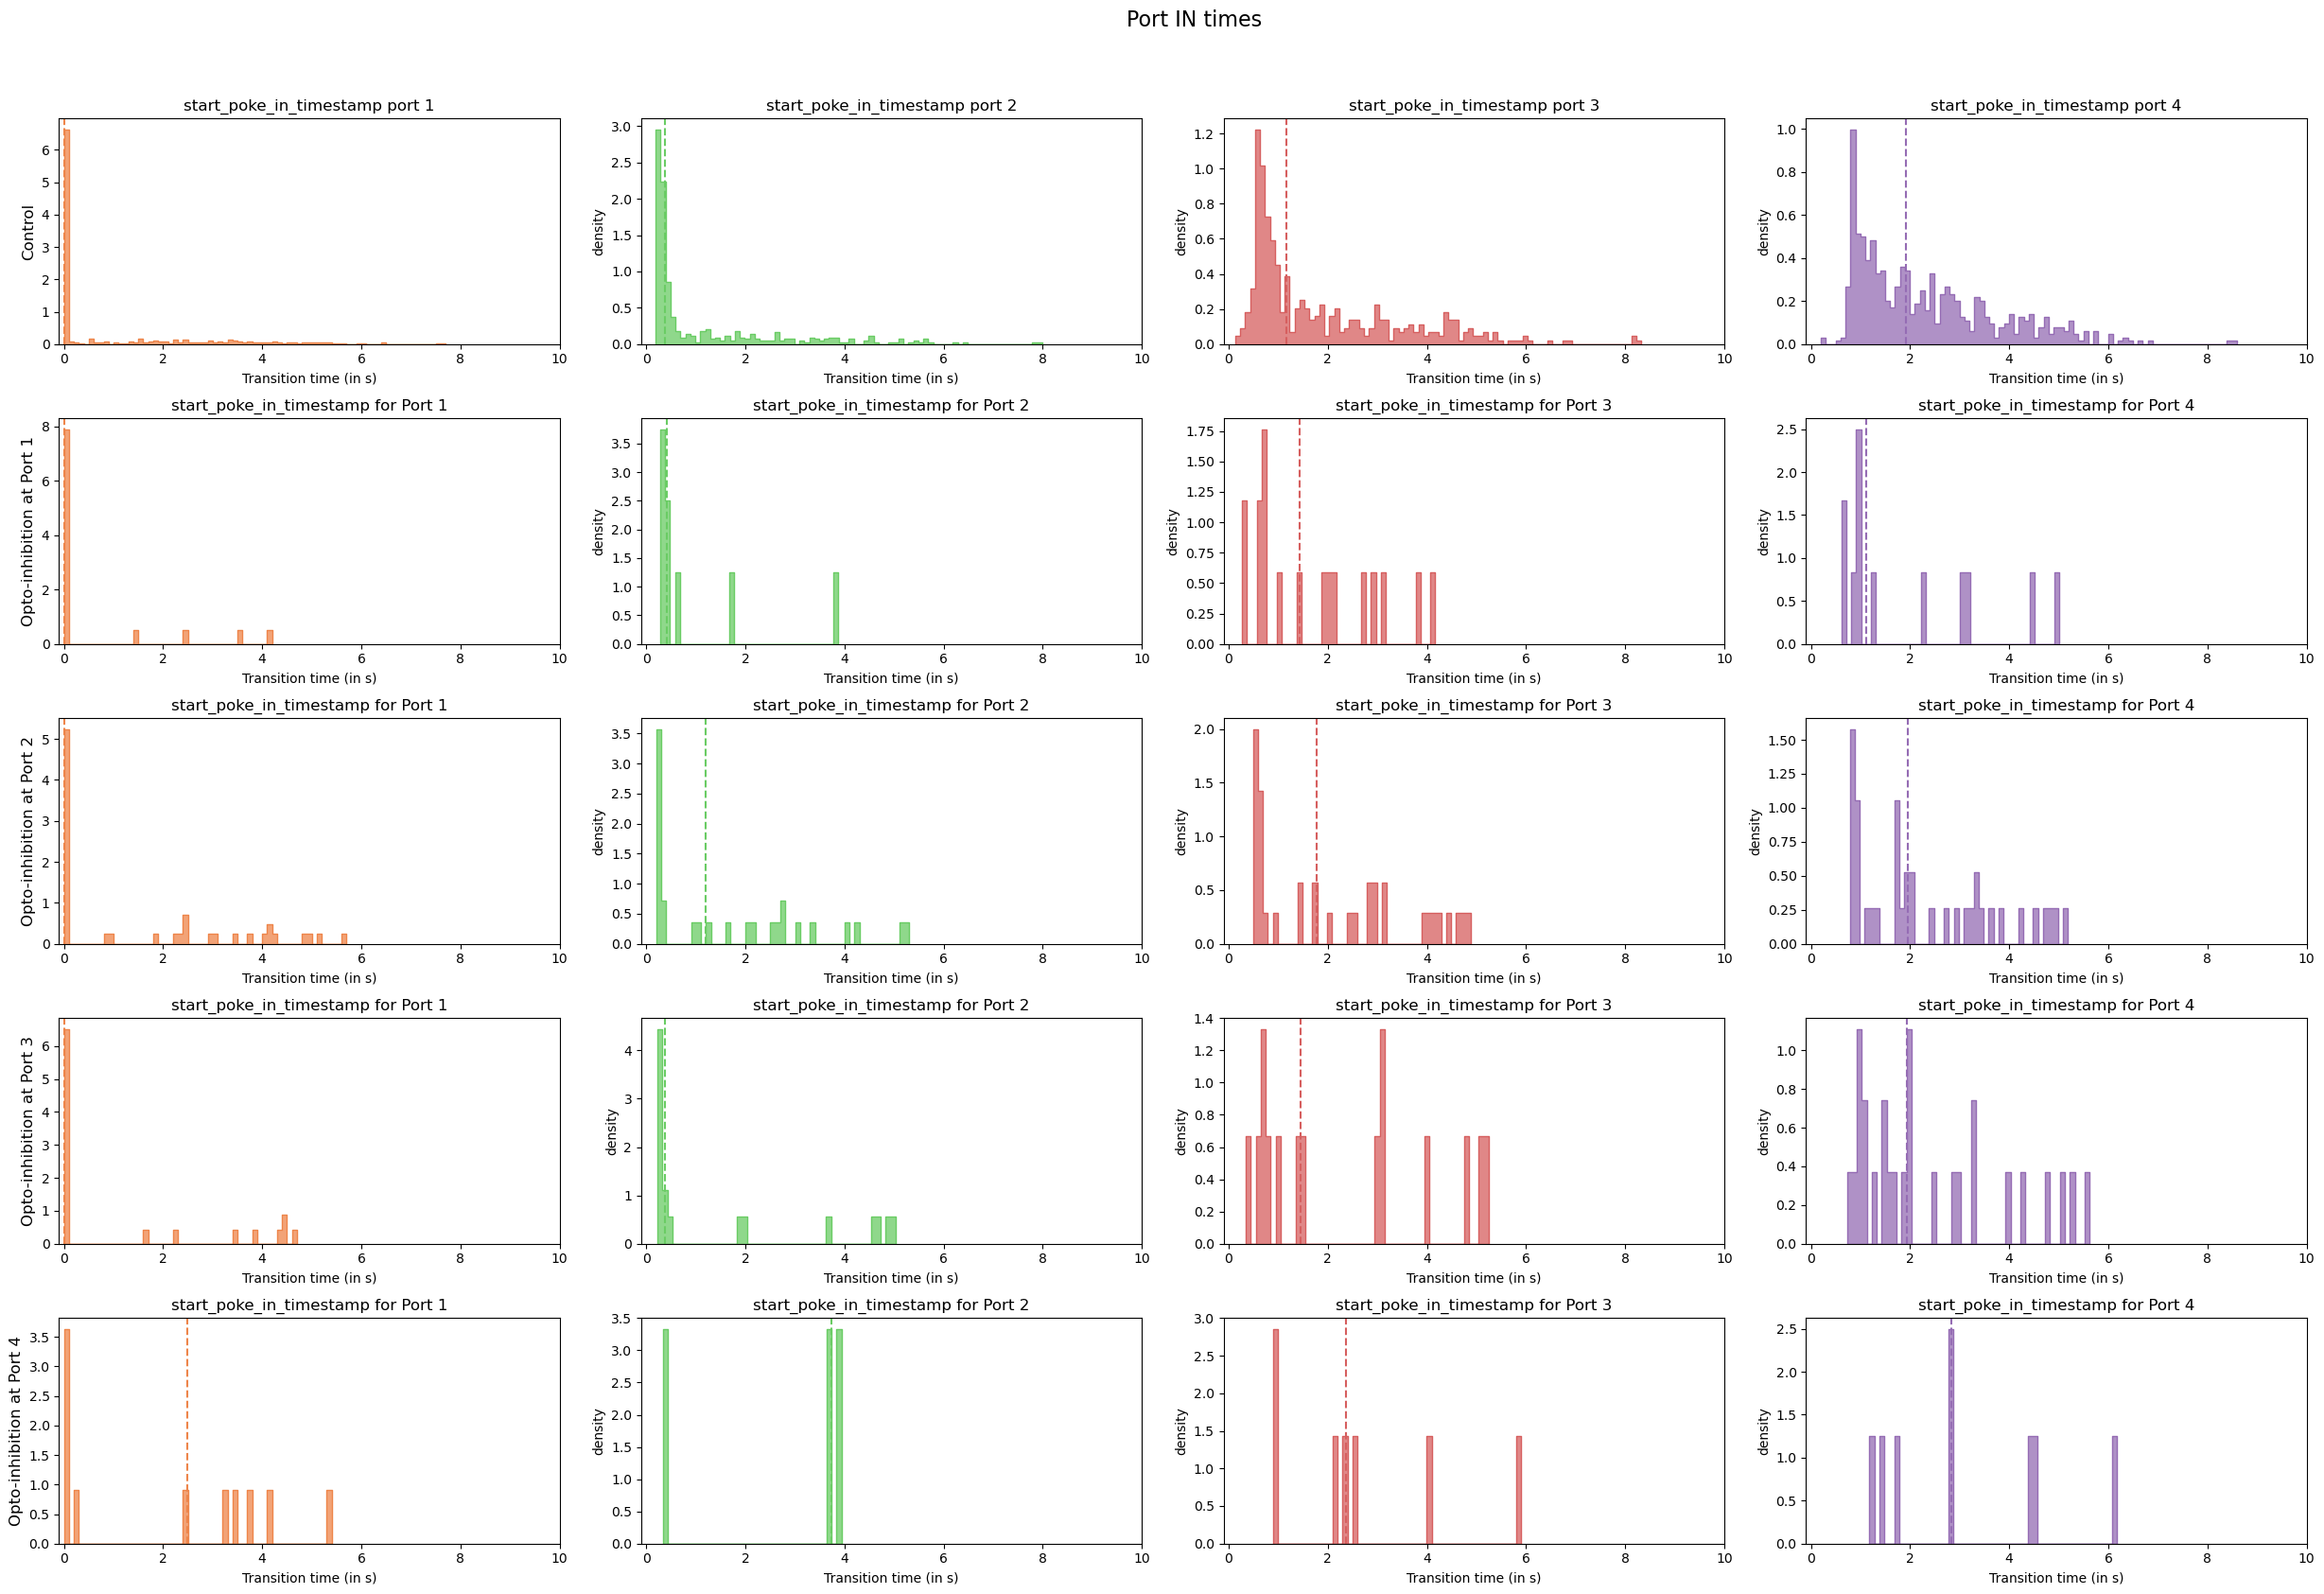

In [58]:
fig, axs = plt.subplots(5, 4, figsize=(24, 16))

plot_timestamp_distribution_subplots(filtered_control_df, 'start_poke_in_timestamp', x_range=(-0.1,10), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(12, 8), axes = axs[0, :])
plot_timestamp_distribution_subplots(filtered_optostim_port_1, 'start_poke_in_timestamp', x_range=(-0.1,10), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(12, 8), axes = axs[1, :])
plot_timestamp_distribution_subplots(filtered_optostim_port_2, 'start_poke_in_timestamp', x_range=(-0.1,10), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(12, 8), axes= axs[2, :])
plot_timestamp_distribution_subplots(filtered_optostim_port_3, 'start_poke_in_timestamp', x_range=(-0.1,10), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(12, 8), axes = axs[3, :])
plot_timestamp_distribution_subplots(filtered_optostim_port_4, 'start_poke_in_timestamp', x_range=(-0.1,10), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(12, 8), axes = axs[4, :])

# set optional titles
# Define row and column labels
row_labels = ['Control', 'Opto-inhibition at Port 1', 'Opto-inhibition at Port 2', 'Opto-inhibition at Port 3', 'Opto-inhibition at Port 4']
col_labels = ['start_poke_in_timestamp port 1', 'start_poke_in_timestamp port 2', 'start_poke_in_timestamp port 3', 'start_poke_in_timestamp port 4']

# Use for loop to set labels
for ax, row in zip(axs[:,0], row_labels):
    ax.set_ylabel(row, rotation=90, size='large')

for ax, col in zip(axs[0], col_labels):
    ax.set_title(col)

# Adjust spaces between subplots and around the plot
# fig.tight_layout()
fig.subplots_adjust(left=0.0) # You can adjust this value as needed

# Add main title for the figure
plt.suptitle("Port IN times", fontsize=16, y=1.05)
plt.show()

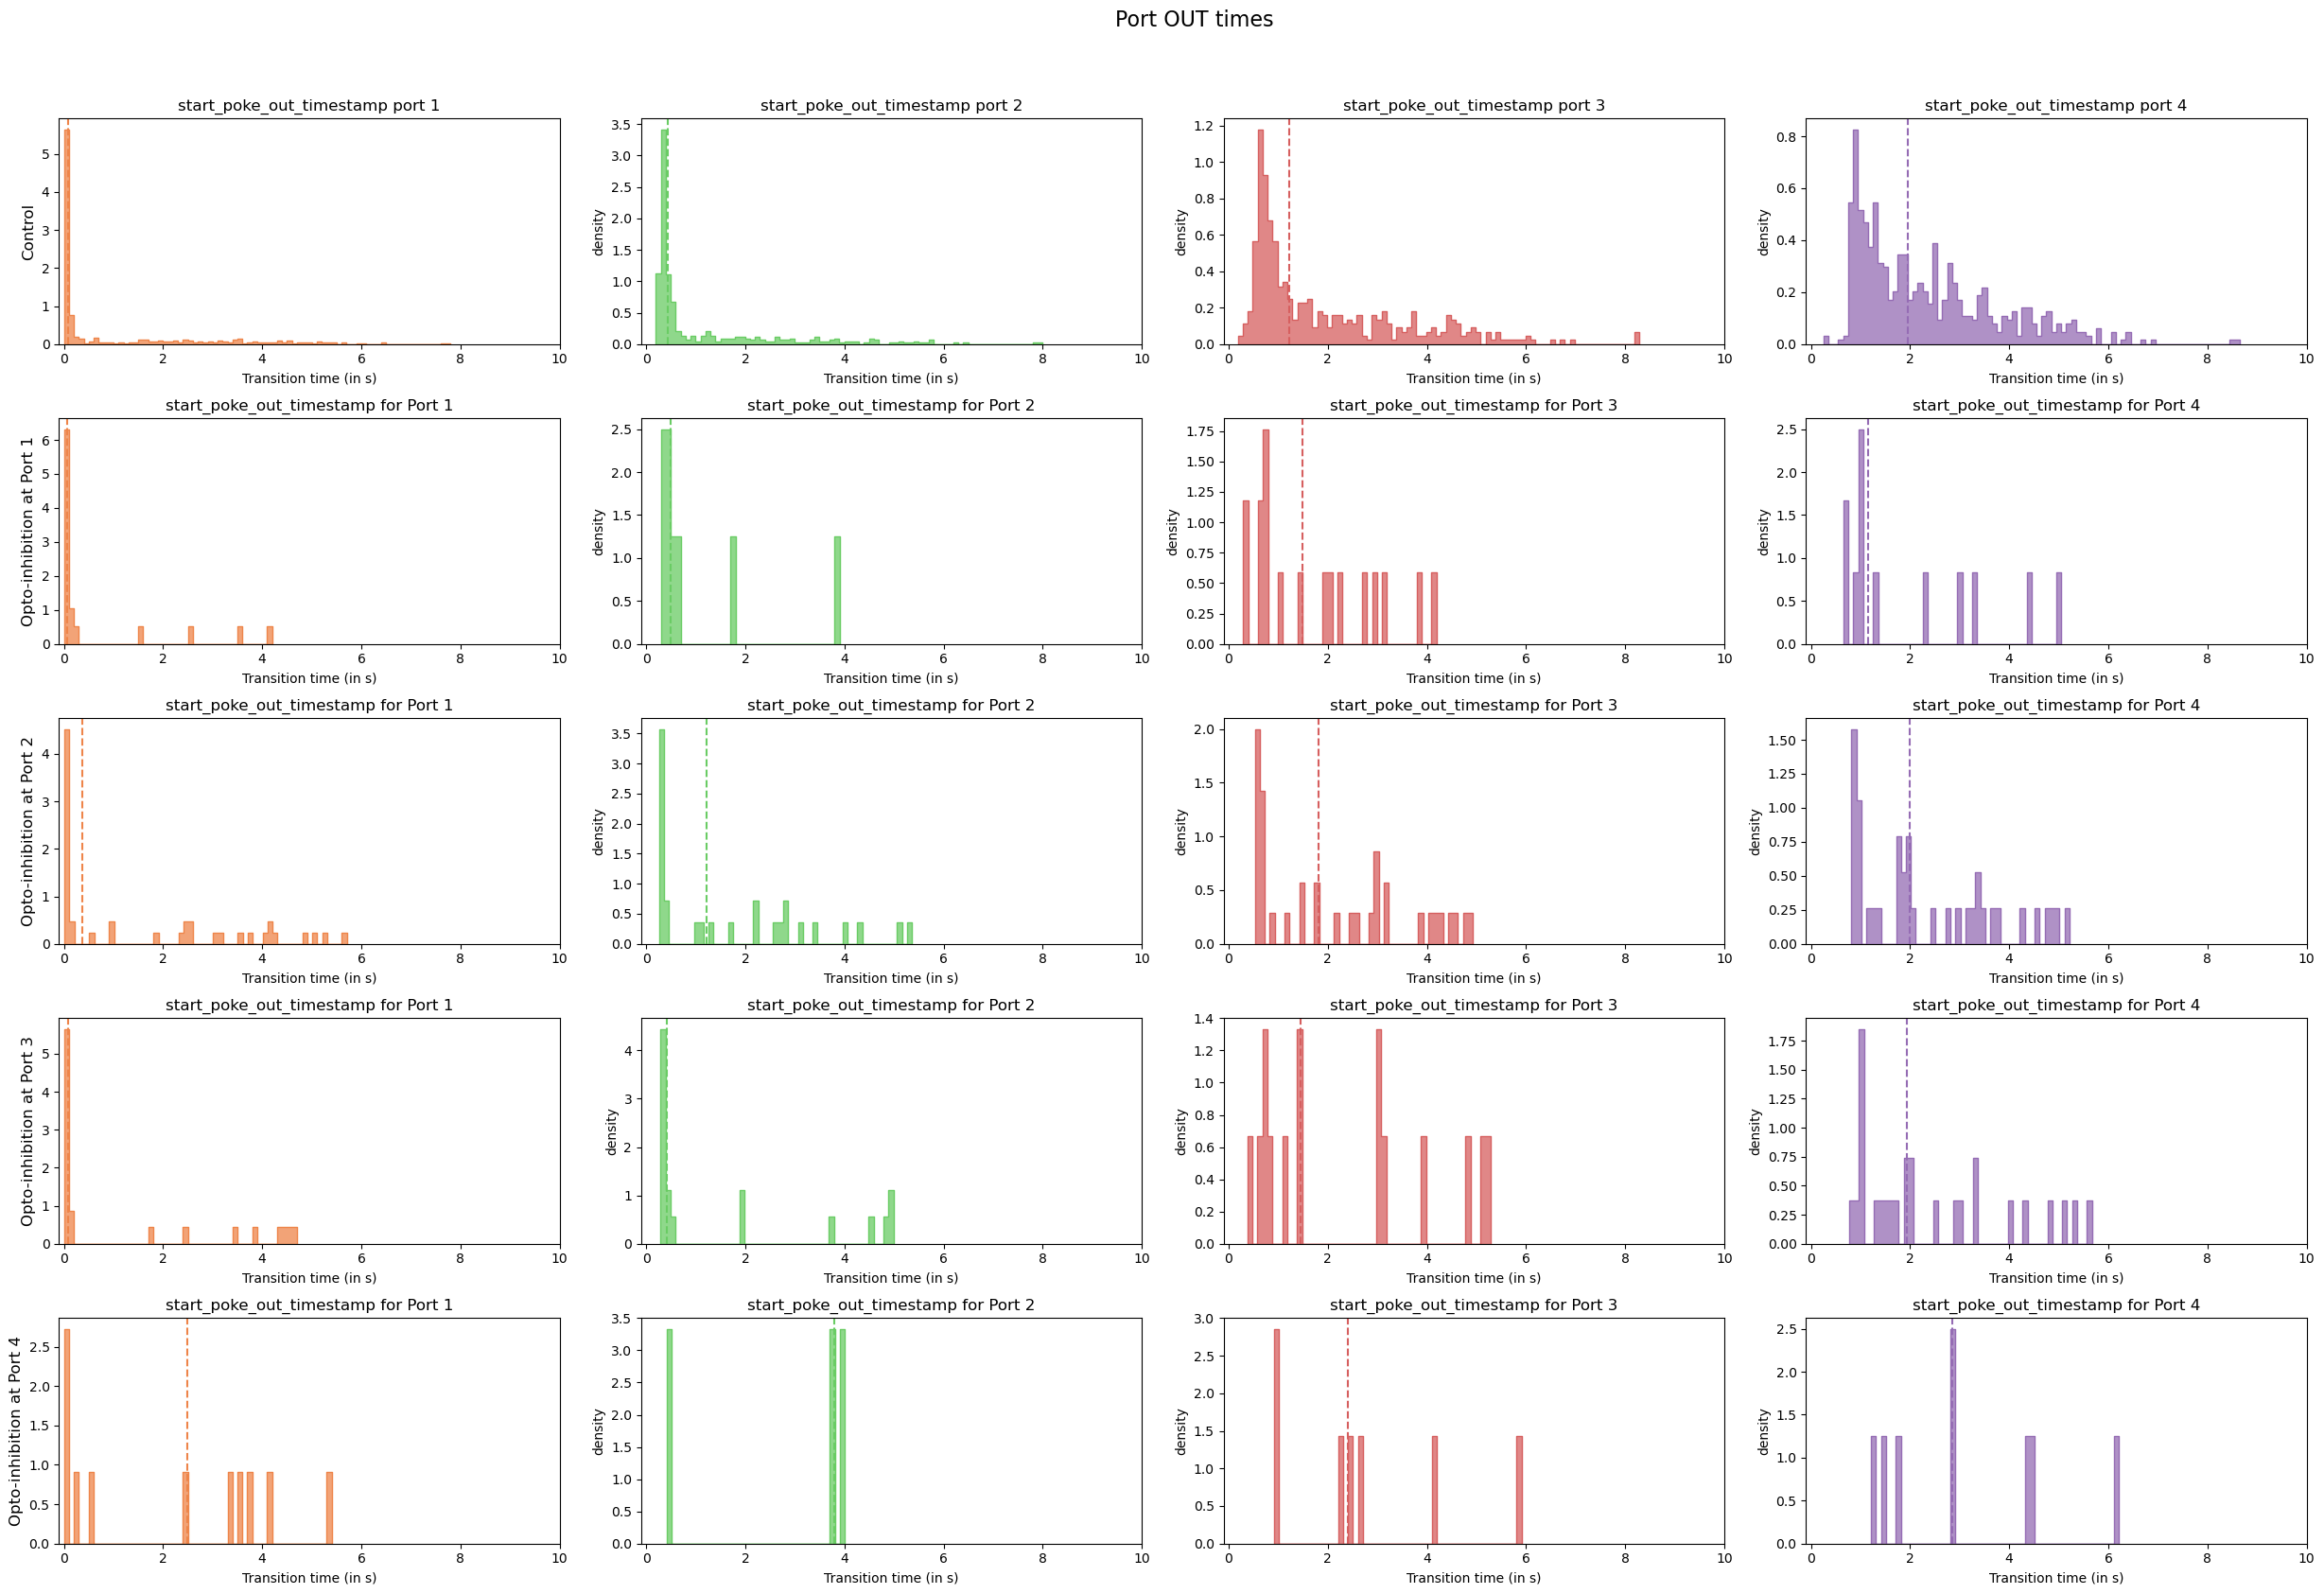

In [59]:
fig, axs = plt.subplots(5, 4, figsize=(24, 16))

plot_timestamp_distribution_subplots(filtered_control_df, 'start_poke_out_timestamp', x_range=(-0.1,10), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(12, 8), axes = axs[0, :])
plot_timestamp_distribution_subplots(filtered_optostim_port_1, 'start_poke_out_timestamp', x_range=(-0.1,10), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(12, 8), axes = axs[1, :])
plot_timestamp_distribution_subplots(filtered_optostim_port_2, 'start_poke_out_timestamp', x_range=(-0.1,10), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(12, 8), axes= axs[2, :])
plot_timestamp_distribution_subplots(filtered_optostim_port_3, 'start_poke_out_timestamp', x_range=(-0.1,10), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(12, 8), axes = axs[3, :])
plot_timestamp_distribution_subplots(filtered_optostim_port_4, 'start_poke_out_timestamp', x_range=(-0.1,10), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(12, 8), axes = axs[4, :])

# set optional titles
# Define row and column labels
row_labels = ['Control', 'Opto-inhibition at Port 1', 'Opto-inhibition at Port 2', 'Opto-inhibition at Port 3', 'Opto-inhibition at Port 4']
col_labels = ['start_poke_out_timestamp port 1', 'start_poke_out_timestamp port 2', 'start_poke_out_timestamp port 3', 'start_poke_out_timestamp port 4']

# Use for loop to set labels
for ax, row in zip(axs[:,0], row_labels):
    ax.set_ylabel(row, rotation=90, size='large')

for ax, col in zip(axs[0], col_labels):
    ax.set_title(col)

# Adjust spaces between subplots and around the plot
# fig.tight_layout()
fig.subplots_adjust(left=0.0) # You can adjust this value as needed

# Add main title for the figure
plt.suptitle("Port OUT times", fontsize=16, y=1.05)
plt.show()

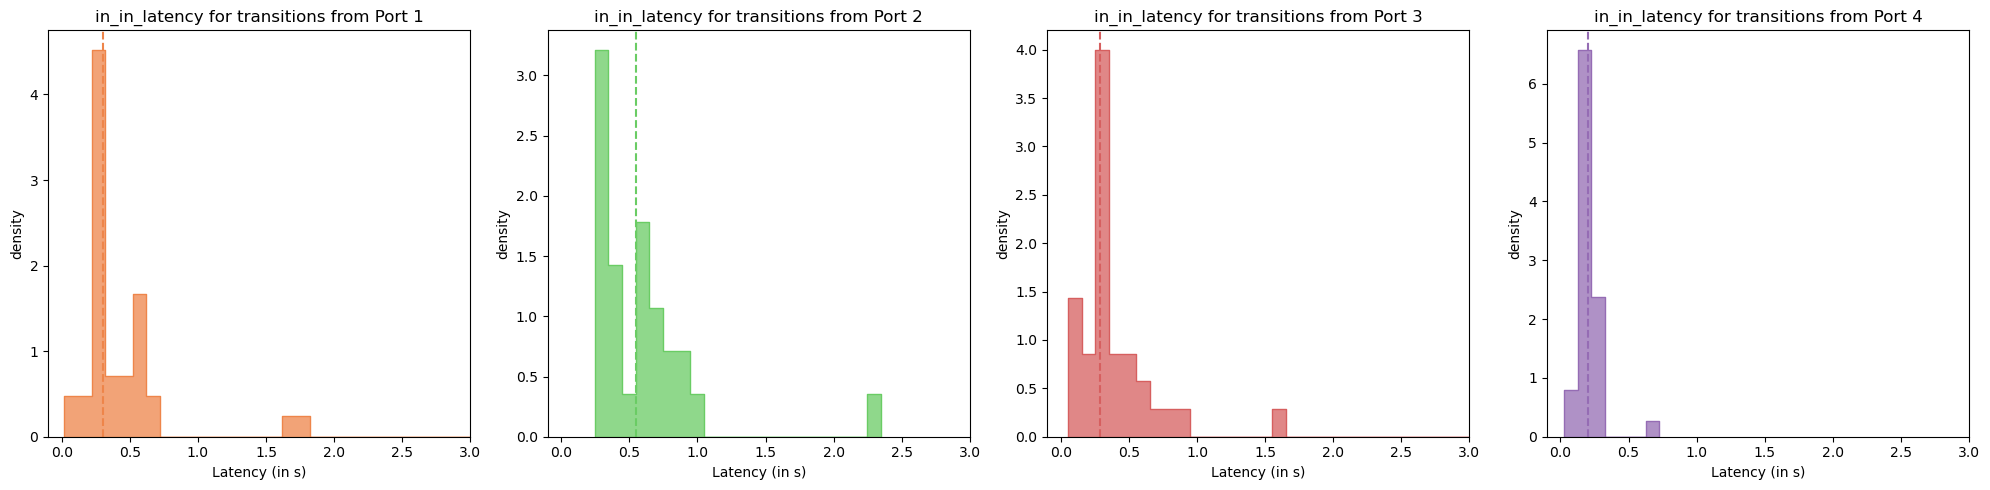

In [60]:
def plot_latency_distribution_subplots(df, latencies, x_range=(0, 5), binwidth = 0.02, stat = 'density', exclude_ports=[], fig_size=(20, 5), axes=None):
    """
    This function plots the distribution of latencies for different ports on separate subplots.

    Parameters:
    df (pandas.DataFrame): Input DataFrame which contains latencies and port information.
    latencies (str): The column name in df for the latency data to plot.
    x_range (tuple): The range of x values to display in the plot.
    exclude_ports (list): List of ports to exclude from the plot.
    fig_size (tuple): The size of the entire figure containing all subplots.
    axes (list of matplotlib.axes.Axes or matplotlib.axes.Axes): List of Axes objects where the plots will be drawn or a single Axes object.
    """
    # List to hold latency data for different ports
    latency_data = []
    # Label each port
    port_labels_offsets = {2: 'Port 1', 1: 'Port 2',
                           6: 'Port 3', 3: 'Port 4',
                           7: 'Port 5', 4: 'Other ports',
                           5: 'Other ports', 8: 'Other ports'}

    for row in df.itertuples(index=False):
        for port, latency in zip(row.start_poke_port, getattr(row, latencies)):
            if port in port_labels_offsets.keys() and port not in exclude_ports:
                latency_data.append((latency, port_labels_offsets[port]))

    # Convert the list to a DataFrame
    latency_df = pd.DataFrame(latency_data, columns=[latencies, 'ports'])

    # Define a list of all possible ports
    possible_ports = ['Port 1', 'Port 2', 'Port 3', 'Port 4', 'Other ports']

    # Create a list of the ports in your data
    data_ports = latency_df['ports'].unique()

    # Create a new ordered_ports list that only includes ports in possible_ports that are also in your data
    ordered_ports = [port for port in possible_ports if port in data_ports]

    # Create a figure to hold the subplots
    if axes is None:
        fig, axes = plt.subplots(nrows=1, ncols=max(1, len(ordered_ports)), figsize=fig_size, sharex=True)
        if len(ordered_ports) == 1:
            axes = np.array([axes])  # Make sure axes is an array to handle single plot scenario

    # Use a color palette
    full_palette = sns.color_palette("muted", len(latency_df['ports'].unique()) + 1)  # Added 1 for starting from the second color
    palette_colors = full_palette[1:] 

    # Plot the distribution of latencies for each port on a separate subplot
    for i, port in enumerate(ordered_ports):
        port_df = latency_df[latency_df['ports'] == port]
        ax = axes[i]
        sns.histplot(port_df, x=latencies, color=palette_colors[i], element="step", binwidth = binwidth, stat = stat, ax=ax)

        # Set the title and labels
        ax.set_title(f'{latencies} for transitions from {port}')
        ax.set_xlabel('Latency (in s)')
        ax.set_ylabel(stat)

        # Set the limits of x-axis to 'zoom' in
        ax.set_xlim(x_range)

        # Add a vertical line at the median value of the distribution
        median_latency = port_df[latencies].median()
        ax.axvline(median_latency, linestyle='--', color=palette_colors[i])

    # Reduce the vertical space between subplots
    plt.tight_layout()

    return ax.figure, axes



fig, axes = plot_latency_distribution_subplots(filtered_optostim_port_2, 'in_in_latency', x_range=(-0.1,3), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(20, 5))
plt.show()


### plot_latency_distribution_subplots for in_in_latency

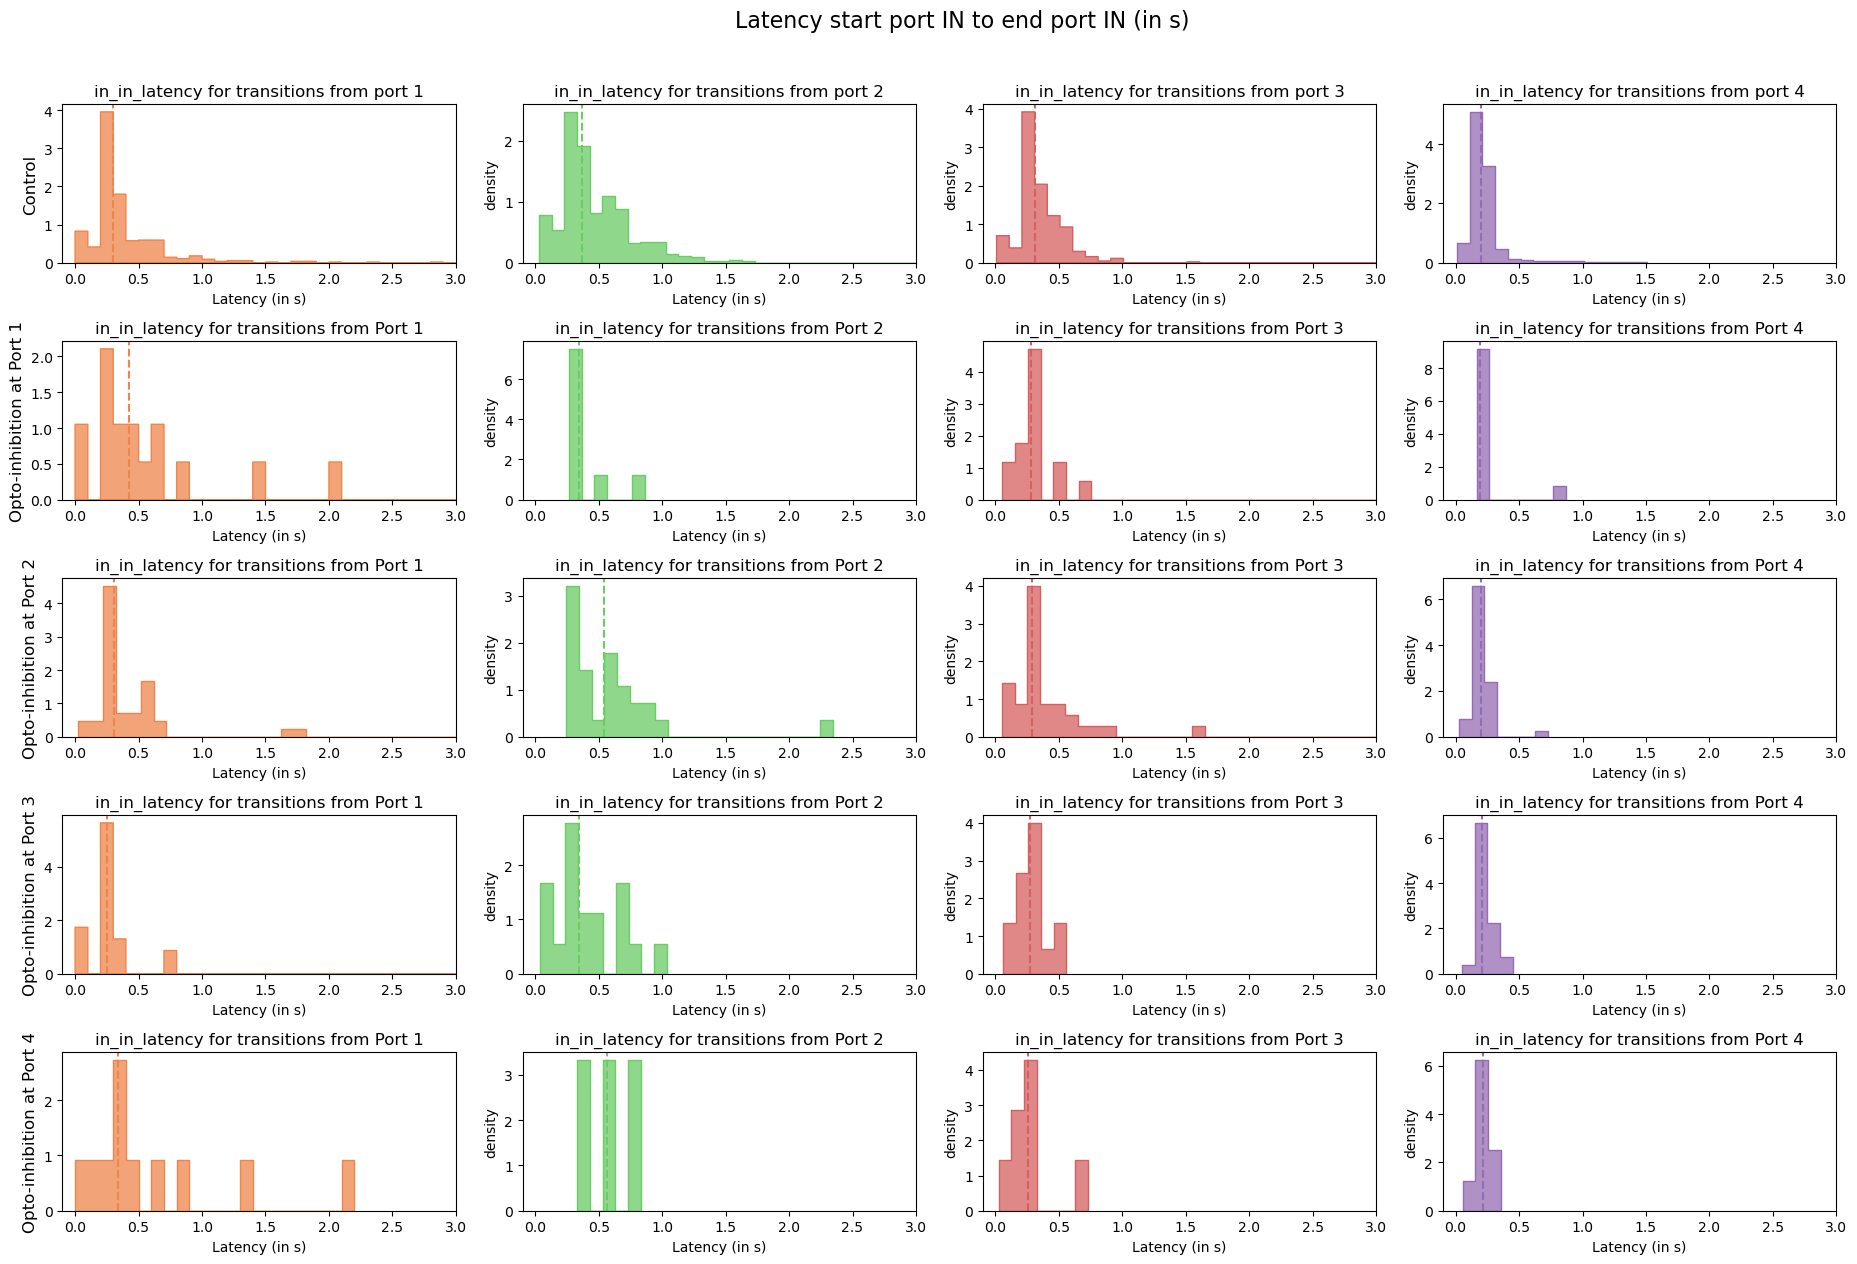

In [61]:
fig, axs = plt.subplots(5, 4, figsize=(18, 12))

plot_latency_distribution_subplots(filtered_control_df, 'in_in_latency', x_range=(-0.1,3), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(20, 5), axes = axs[0, :])
plot_latency_distribution_subplots(filtered_optostim_port_1, 'in_in_latency', x_range=(-0.1,3), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(20, 5), axes = axs[1, :])
plot_latency_distribution_subplots(filtered_optostim_port_2, 'in_in_latency', x_range=(-0.1,3), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(20, 5), axes= axs[2, :])
plot_latency_distribution_subplots(filtered_optostim_port_3, 'in_in_latency', x_range=(-0.1,3), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(20, 5), axes = axs[3, :])
plot_latency_distribution_subplots(filtered_optostim_port_4, 'in_in_latency', x_range=(-0.1,3), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(20, 5), axes = axs[4, :])

# You can hide the unused subplot with this line
# axs[1, 0].axis('off')

# Define row and column labels
row_labels = ['Control', 'Opto-inhibition at Port 1', 'Opto-inhibition at Port 2', 'Opto-inhibition at Port 3', 'Opto-inhibition at Port 4']
col_labels = ['in_in_latency for transitions from port 1', 'in_in_latency for transitions from port 2', 'in_in_latency for transitions from port 3', 'in_in_latency for transitions from port 4']

# Use for loop to set labels
for ax, row in zip(axs[:,0], row_labels):
    ax.set_ylabel(row, rotation=90, size='large')

for ax, col in zip(axs[0], col_labels):
    ax.set_title(col)

# Adjust spaces between subplots and around the plot
# fig.tight_layout()
fig.subplots_adjust(left=0.0) # You can adjust this value as needed

# Add main title for the figure
plt.suptitle("Latency start port IN to end port IN (in s)", fontsize=16, y = 1.05)
plt.show()

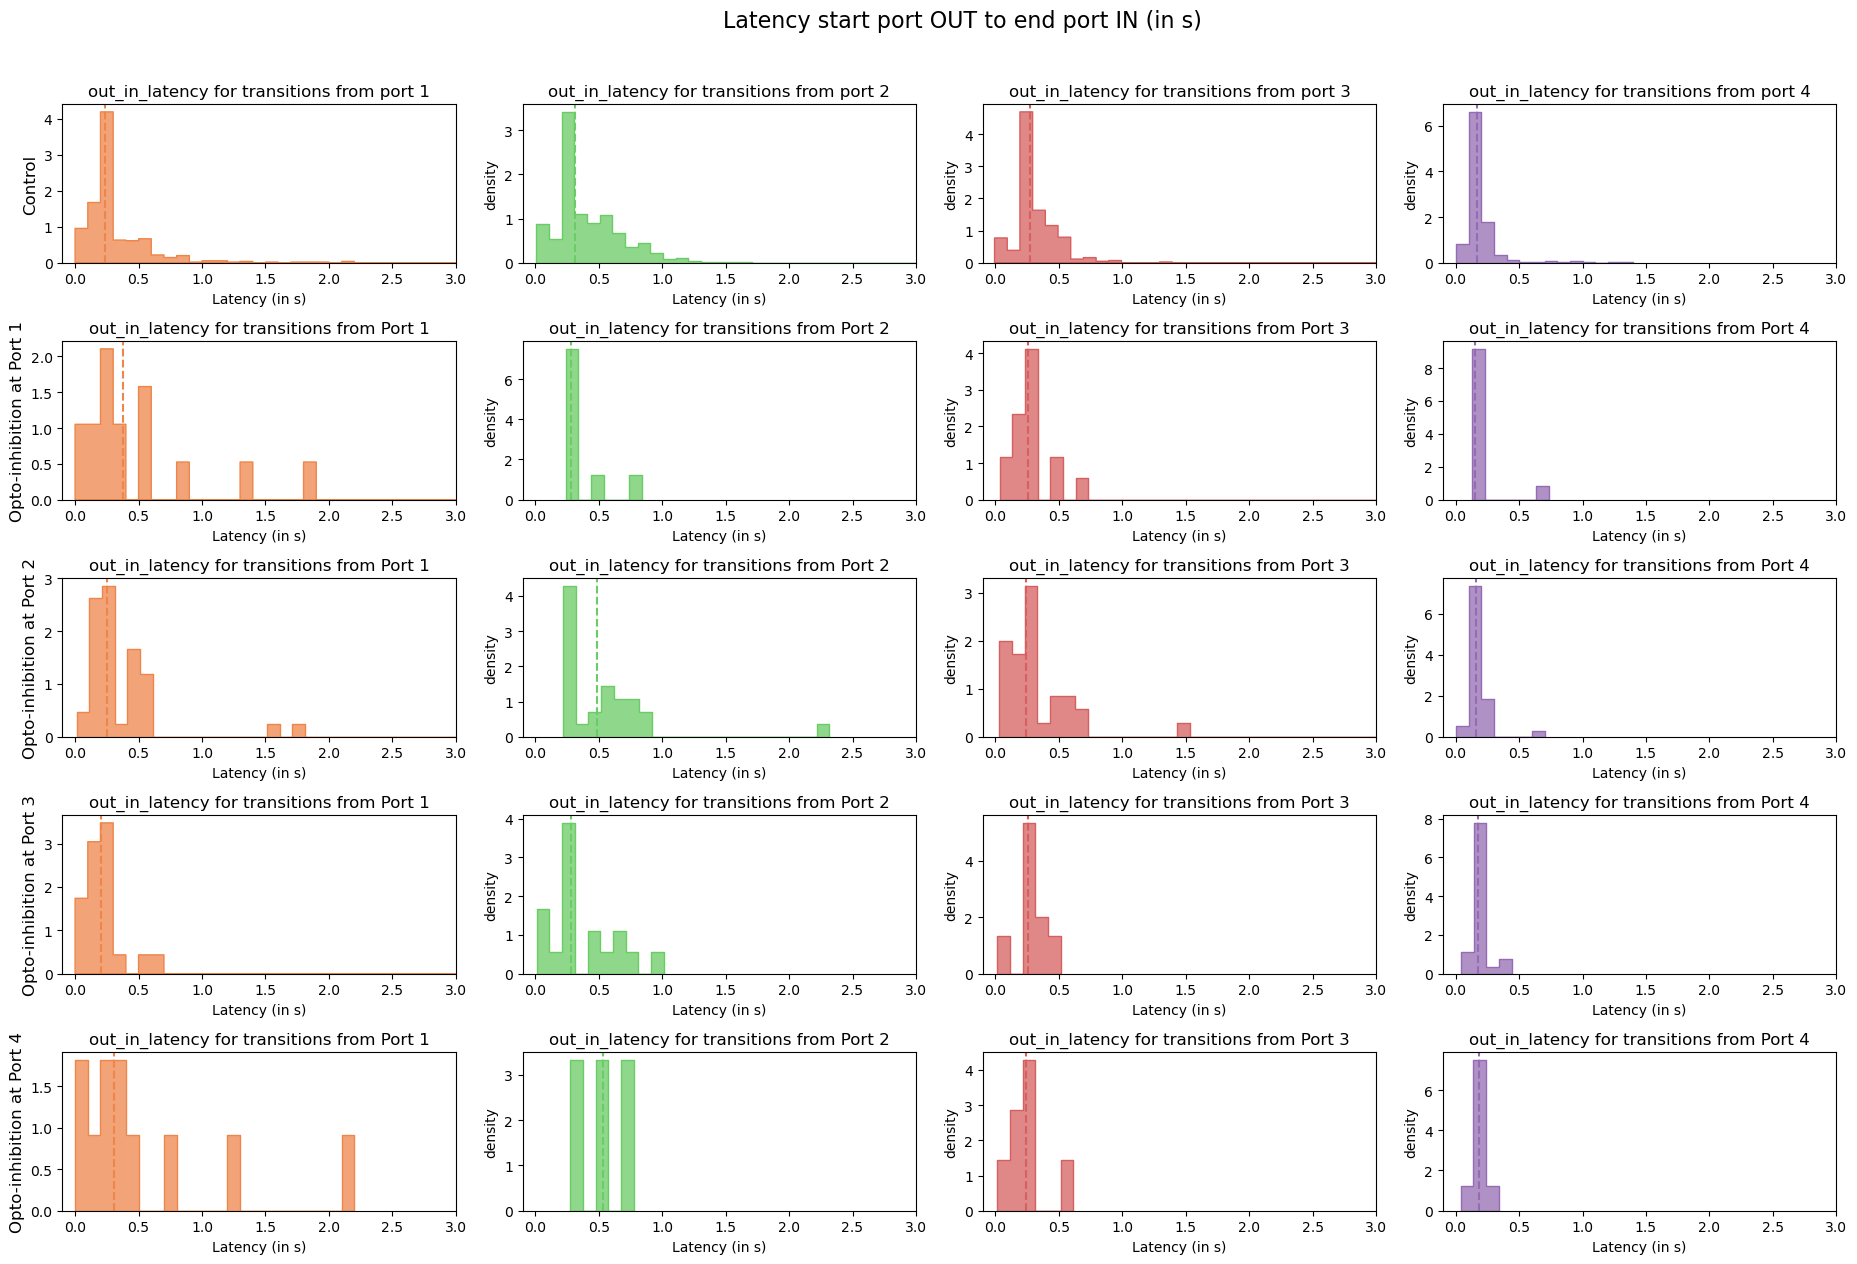

In [62]:
fig, axs = plt.subplots(5, 4, figsize=(18, 12))

plot_latency_distribution_subplots(filtered_control_df, 'out_in_latency', x_range=(-0.1,3), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(20, 5), axes = axs[0, :])
plot_latency_distribution_subplots(filtered_optostim_port_1, 'out_in_latency', x_range=(-0.1,3), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(20, 5), axes = axs[1, :])
plot_latency_distribution_subplots(filtered_optostim_port_2, 'out_in_latency', x_range=(-0.1,3), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(20, 5), axes= axs[2, :])
plot_latency_distribution_subplots(filtered_optostim_port_3, 'out_in_latency', x_range=(-0.1,3), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(20, 5), axes = axs[3, :])
plot_latency_distribution_subplots(filtered_optostim_port_4, 'out_in_latency', x_range=(-0.1,3), binwidth = 0.1, stat = 'density', exclude_ports=[7, 4, 5, 8], fig_size=(20, 5), axes = axs[4, :])

# You can hide the unused subplot with this line
# axs[1, 0].axis('off')

# Define row and column labels
row_labels = ['Control', 'Opto-inhibition at Port 1', 'Opto-inhibition at Port 2', 'Opto-inhibition at Port 3', 'Opto-inhibition at Port 4']
col_labels = ['out_in_latency for transitions from port 1', 'out_in_latency for transitions from port 2', 'out_in_latency for transitions from port 3', 'out_in_latency for transitions from port 4']

# Use for loop to set labels
for ax, row in zip(axs[:,0], row_labels):
    ax.set_ylabel(row, rotation=90, size='large')

for ax, col in zip(axs[0], col_labels):
    ax.set_title(col)

# Adjust spaces between subplots and around the plot
# fig.tight_layout()
fig.subplots_adjust(left=0.0) # You can adjust this value as needed

# Add main title for the figure
plt.suptitle("Latency start port OUT to end port IN (in s)", fontsize=16, y = 1.05)
plt.show()

In [63]:
# do some basic calculations
# length of the sequence

def get_lengths_for_unique_trials(df, column_name):
    # Get all unique cumulative_trial_ids and sort them
    unique_trial_ids = df['cumulative_trial_id'].unique()
    unique_trial_ids.sort()

    # Create an empty list to store the lengths of column_name for each unique trial ID
    lengths = []

    # Loop through the unique_trial_ids
    for trial_id in unique_trial_ids:
        # Filter the DataFrame for the current trial_id
        trial_df = df[df['cumulative_trial_id'] == trial_id]

        # Get the length of the column_name for the current trial_id and append it to the lengths list
        length = len(trial_df[column_name].iloc[0])
        lengths.append(length)

    return lengths

In [64]:
#TODO filter sequences according to time threshold to execute the action sequence

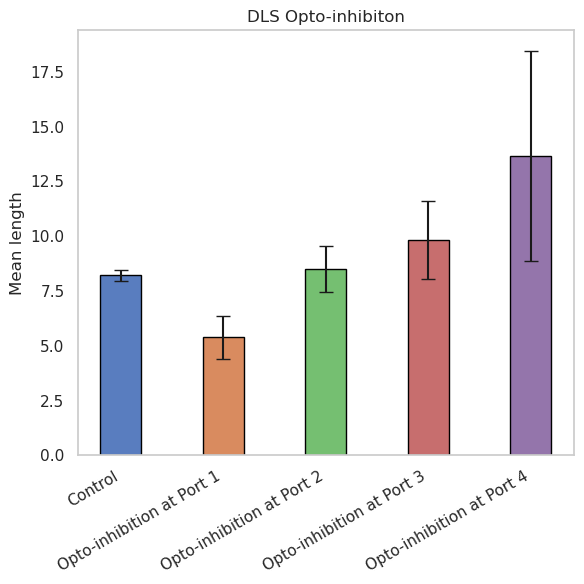

T-Test: Control vs Opto-inhibition at Port 1
T-Statistic: 2.190065357006913
P-Value: 0.029178925840152126
Result: Significant difference

T-Test: Control vs Opto-inhibition at Port 2
T-Statistic: -0.26388083768582804
P-Value: 0.7920231494100977
Result: No significant difference

T-Test: Control vs Opto-inhibition at Port 3
T-Statistic: -1.1642861455445621
P-Value: 0.24510334595166455
Result: No significant difference

T-Test: Control vs Opto-inhibition at Port 4
T-Statistic: -2.0116179827233482
P-Value: 0.04504885007354033
Result: Significant difference



In [65]:
# List of DataFrames
dataframes_list = [filtered_control_df, filtered_optostim_port_1, filtered_optostim_port_2, filtered_optostim_port_3, filtered_optostim_port_4]

# Column name to analyze (e.g., 'start_poke_port')
column_name = 'start_poke_port'

# Data labels for the bar plot
data_labels = ['Control', 'Opto-inhibition at Port 1', 'Opto-inhibition at Port 2', 'Opto-inhibition at Port 3', 'Opto-inhibition at Port 4']

# Create a dictionary to store statistics for each DataFrame
statistics_dict = {}

# List to store the data samples for t-tests
data_samples = []

# Loop through the list of DataFrames
for index, df in enumerate(dataframes_list):
    # Get the lengths for the current DataFrame and column_name
    lengths_list = get_lengths_for_unique_trials(df, column_name)

    # Calculate basic statistics
    stats = {
        'mean': sum(lengths_list) / len(lengths_list),
        'std': pd.Series(lengths_list).std(),
        'sem': pd.Series(lengths_list).sem()
    }

    statistics_dict[data_labels[index]] = stats

    # Append the lengths_list to data_samples for t-tests
    data_samples.append(lengths_list)

# Perform t-tests between Control and other groups
control_data = data_samples[0]
t_test_results = {}
for i, group_data in enumerate(data_samples[1:], start=1):
    t_stat, p_value = ttest_ind(control_data, group_data)
    t_test_results[data_labels[i]] = {'T-Statistic': t_stat, 'P-Value': p_value, 'Significant': p_value < 0.05}

# Create a DataFrame from the statistics dictionary for easier plotting
statistics_df = pd.DataFrame(statistics_dict).transpose()

# Plotting (Same as before)
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=data_labels, y='mean', data=statistics_df, palette="muted", errwidth=1.5, edgecolor='black', width=0.4)

# Add error bars with S.D.
# ax.errorbar(range(len(statistics_df)), statistics_df['mean'], yerr=statistics_df['std'], fmt='none', c='k', capsize=5)

# Add error bars with SEM
ax.errorbar(range(len(statistics_df)), statistics_df['mean'], yerr=statistics_df['sem'], fmt='none', c='k', capsize=5)

ax.set_ylabel('Mean length')
plt.xticks(rotation=30, ha='right', va='top')
plt.title(f'DLS Opto-inhibiton')
plt.grid(False)
plt.tight_layout()
plt.show()

# Print t-test results
for group, result in t_test_results.items():
    print(f"T-Test: Control vs {group}")
    print(f"T-Statistic: {result['T-Statistic']}")
    print(f"P-Value: {result['P-Value']}")
    if result['Significant']:
        print("Result: Significant difference\n")
    else:
        print("Result: No significant difference\n")

In [ ]:
def compute_levenshtein_distance(test_sequence, target_sequence='21637', start_port='2'):
    """
    Compute the Levenshtein distance between the test sequence and the target sequence.

    The Levenshtein distance is the minimum number of single-character edits 
    (insertions, deletions or substitutions) required to change one sequence into the other.

    Parameters:
    test_sequence (str): The sequence to compare against the target. 
                         This sequence should be a string representation of poke ports.
    target_sequence (str): The target sequence. This is the sequence to which we are comparing 
                           the test sequence. Default is '21637'.
    start_port (str): The poke port number at which the sequence starts, represented as a string. Default is '2'.

    Returns:
    float: The Levenshtein distance between the test sequence and the target sequence.
    """

    # Disregard anything before the first occurrence of start_port in the test sequence
    test_sequence = test_sequence[test_sequence.index(start_port):] if start_port in test_sequence else test_sequence

    size_x = len(test_sequence) + 1
    size_y = len(target_sequence) + 1
    matrix = np.zeros((size_x, size_y))

    # Initialize the first row and first column
    matrix[:, 0] = range(size_x)
    matrix[0, :] = range(size_y)

    # Compute the rest of the matrix
    for x in range(1, size_x):
        for y in range(1, size_y):
            if test_sequence[x - 1] == target_sequence[y - 1]:
                matrix[x, y] = min(
                    matrix[x - 1, y] + 1,     # Deletion
                    matrix[x - 1, y - 1],     # Substitution
                    matrix[x, y - 1] + 1      # Insertion
                )
            else:
                matrix[x, y] = min(
                    matrix[x - 1, y] + 1,     # Deletion
                    matrix[x - 1, y - 1] + 1, # Substitution
                    matrix[x, y - 1] + 1      # Insertion
                )

    # The final Levenshtein distance is the value in the bottom right corner of the matrix
    return matrix[size_x - 1, size_y - 1]

# print(compute_levenshtein_distance(start_poke_ports, perfect_sequence, start_port))bin

def get_edit_distance_statistics(df, max_edit_distance=20):
    """
    Calculate Levenshtein distances for sequences in a DataFrame and return edit distance statistics.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data for analysis.
            It should have a column 'cumulative_trial_id' representing the trial IDs.

    Returns:
        dict: A dictionary containing statistics and the distances array.
            The dictionary has the following keys:
                - 'mean_distance': The mean Levenshtein distance.
                - 'median_distance': The median Levenshtein distance.
                - 'min_distance': The minimum Levenshtein distance.
                - 'max_distance': The maximum Levenshtein distance.
                - 'std_distance': The standard deviation of Levenshtein distances.
                - 'distances_array': A numpy array containing all the Levenshtein distances.
    """
    # Get all unique cumulative_trial_ids from the DataFrame and sort them
    unique_trial_ids = df['cumulative_trial_id'].unique()
    unique_trial_ids.sort()

    # Create a list to store all sequences
    sequences = []

    # Loop over all unique cumulative_trial_ids and compute the sequences
    for id in unique_trial_ids:
        # Filter the DataFrame for the specific id
        filtered_df = df[df['cumulative_trial_id'] == id].reset_index(drop=True)
        # Get the start poke ports and in_in_latencies sequences for this trial_id
        start_poke_ports, _, _, _ = get_sequence_info(filtered_df)  # Define this function separately
        # Append the sequence to the list as a concatenated string
        sequences.append(''.join(str(p) for p in start_poke_ports))

    # Now we have a list of all sequences and we can compute the Levenshtein distance for all pairs of sequences
    # Create a list to store all Levenshtein distances
    distances = []

    # Loop over each sequence to compute Levenshtein distance
    for sequence in sequences:
        # Compute the Levenshtein distance between the sequence and the target_sequence (target_sequence is not defined in the code)
        distance = compute_levenshtein_distance(sequence)  # Define this function separately
        distances.append(distance)

    # Convert the list to a numpy array for easier calculations
    distance_array = np.array(distances)

    # Discard sequences with an edit distance greater than max_edit_distance
    distance_array = distance_array[distance_array <= max_edit_distance]

    # Calculate statistics
    mean_distance = np.mean(distance_array)
    median_distance = np.median(distance_array)
    min_distance = np.min(distance_array)
    max_distance = np.max(distance_array)
    std_distance = np.std(distance_array)

    # Create the result dictionary
    edit_statistics = {
        'mean_distance': mean_distance,
        'median_distance': median_distance,
        'min_distance': min_distance,
        'max_distance': max_distance,
        'std_distance': std_distance,
        'distances_array': distance_array
    }

    return edit_statistics

optostim_port_1 = opto_df_1_5[opto_df_1_5['opto_stimulated_port'] == 1]
optostim_port_2 = opto_df_1_5[opto_df_1_5['opto_stimulated_port'] == 2]
optostim_port_3 = opto_df_1_5[opto_df_1_5['opto_stimulated_port'] == 3]
optostim_port_4 = opto_df_1_5[opto_df_1_5['opto_stimulated_port'] == 4]

edit_statistics = get_edit_distance_statistics(control_df)

# Print the statistics for the DataFrame
print("Edit distance statistics:")
print(f"Mean distance: {edit_statistics['mean_distance']}")
print(f"Median distance: {edit_statistics['median_distance']}")
print(f"Min distance: {edit_statistics['min_distance']}")
print(f"Max distance: {edit_statistics['max_distance']}")
print(f"Standard deviation of distances: {edit_statistics['std_distance']}")

# Now, plot the histogram of distances
plt.figure(figsize=(10, 6))
sns.histplot(edit_statistics['distances_array'], bins=20, kde=True, color='darkblue', label='Data')
plt.title("Histogram of Levenshtein Distances from Target Sequence")
plt.xlabel("Levenshtein Distance")
plt.ylabel("Count")
plt.legend()
plt.show()


In [ ]:
def plot_edit_distance_histograms(edit_statistics_list, labels, control_bins=50, other_bins=5):
    """
    Plot histograms of Levenshtein distances for multiple DataFrames.

    Parameters:
        edit_statistics_list (list): A list of edit distance statistics dictionaries for each DataFrame.
            Each dictionary should contain 'distances_array' key.
        labels (list): A list of labels for each DataFrame (e.g., ['Port 1', 'Port 2', ...]).
        control_bins (int): Number of bins for the 'control' DataFrame.
        other_bins (int): Number of bins for other DataFrames.
    """
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette("Set1", n_colors=len(edit_statistics_list))

    for idx, stats in enumerate(edit_statistics_list):
        distances_array = stats['distances_array']
        if labels[idx] == 'control':
            bins = control_bins
        else:
            bins = other_bins
        sns.kdeplot(data=distances_array, color=colors[idx], label=labels[idx])
        
        # Create a Gaussian kernel density estimate
        kde = gaussian_kde(distances_array)

        # Generate points for the x axis
        x_points = np.linspace(distances_array.min(), distances_array.max(), 500)

        # Evaluate the KDE on these points
        densities = kde.evaluate(x_points)

        # Find the x value that corresponds to the peak of the density
        peak_density_x = x_points[np.argmax(densities)]

        # Plot a vertical line at the peak
        plt.axvline(peak_density_x, color=colors[idx], linestyle='--', alpha=0.5)
     
    plt.title("Histogram of Levenshtein Distances from Target Sequence")
    plt.xlabel("Levenshtein Distance")
    plt.ylabel("Density")
    plt.legend()
    sns.despine()
    plt.gca().set_aspect('auto')

    # Find the first 99 percentile of the data and set xlim accordingly
    percentile_99 = np.percentile(np.concatenate([stats['distances_array'] for stats in edit_statistics_list]), 99)
    plt.xlim(0, percentile_99)

    # Switch off the grid
    plt.grid(False)

    plt.show()

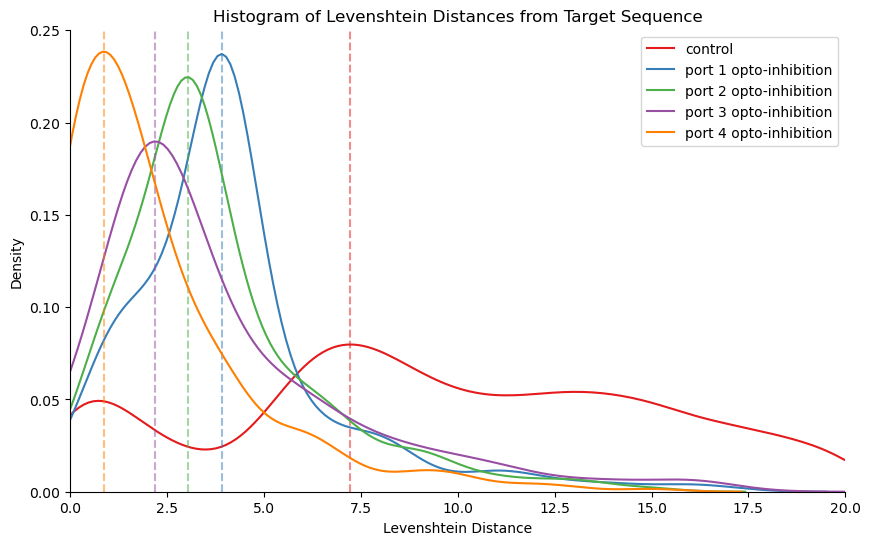

In [ ]:
# Calculate edit statistics for each DataFrame
edit_statistics_control = get_edit_distance_statistics(control_df)
edit_statistics_port_1_opto = get_edit_distance_statistics(optostim_port_1)
edit_statistics_port_2_opto = get_edit_distance_statistics(optostim_port_2)
edit_statistics_port_3_opto = get_edit_distance_statistics(optostim_port_3)
edit_statistics_port_4_opto = get_edit_distance_statistics(optostim_port_4)

# Create a list of edit statistics and port labels
edit_statistics_list = [edit_statistics_control, edit_statistics_port_1_opto, edit_statistics_port_2_opto, edit_statistics_port_3_opto, edit_statistics_port_4_opto]
labels = ['control', 'port 1 opto-inhibition', 'port 2 opto-inhibition', 'port 3 opto-inhibition', 'port 4 opto-inhibition']

# Plot the histograms for all DataFrames in the same plot
plot_edit_distance_histograms(edit_statistics_list, labels)



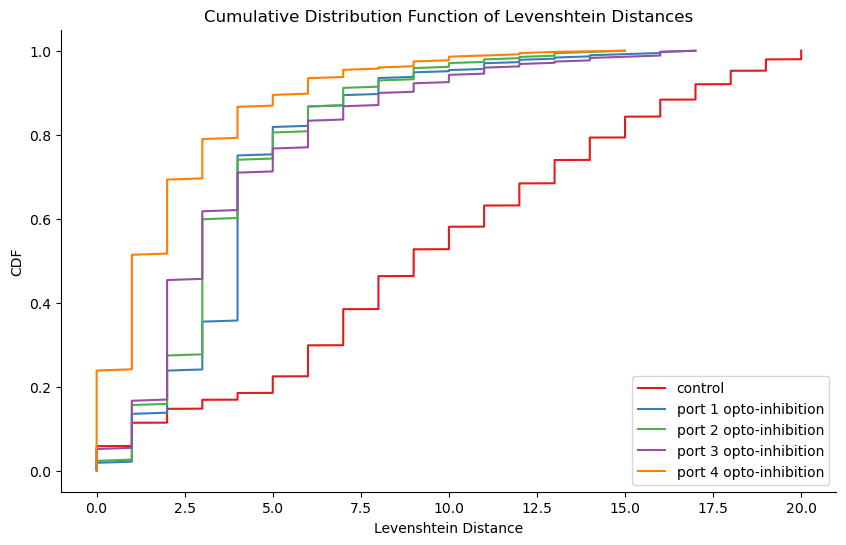

K-S statistic between control and port 1 opto-inhibition: 0.59
P-value: 0.00
K-S statistic between control and port 2 opto-inhibition: 0.58
P-value: 0.00
K-S statistic between control and port 3 opto-inhibition: 0.54
P-value: 0.00
K-S statistic between control and port 4 opto-inhibition: 0.68
P-value: 0.00
K-S statistic between port 1 opto-inhibition and port 2 opto-inhibition: 0.24
P-value: 0.00
K-S statistic between port 1 opto-inhibition and port 3 opto-inhibition: 0.26
P-value: 0.00
K-S statistic between port 1 opto-inhibition and port 4 opto-inhibition: 0.45
P-value: 0.00
K-S statistic between port 2 opto-inhibition and port 3 opto-inhibition: 0.18
P-value: 0.00
K-S statistic between port 2 opto-inhibition and port 4 opto-inhibition: 0.42
P-value: 0.00
K-S statistic between port 3 opto-inhibition and port 4 opto-inhibition: 0.35
P-value: 0.00


In [ ]:
def plot_cdfs_and_perform_ks(edit_statistics_list, labels):
    """
    Plot CDFs of Levenshtein distances for multiple DataFrames and perform KS test between each pair of DataFrames.

    Parameters:
        edit_statistics_list (list): A list of edit distance statistics dictionaries for each DataFrame.
            Each dictionary should contain 'distances_array' key.
        labels (list): A list of labels for each DataFrame (e.g., ['Port 1', 'Port 2', ...]).
    """
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette("Set1", n_colors=len(edit_statistics_list))

    for idx, stats in enumerate(edit_statistics_list):
        distances_array = stats['distances_array']
        ecdf = ECDF(distances_array) # Calculate ECDF
        plt.plot(ecdf.x, ecdf.y, color=colors[idx], label=labels[idx])

    plt.title("Cumulative Distribution Function of Levenshtein Distances")
    plt.xlabel("Levenshtein Distance")
    plt.ylabel("CDF")
    plt.legend()
    sns.despine()
    plt.gca().set_aspect('auto')
    plt.show()

    # Perform KS test between each pair of dataframes and print the results
    for i in range(len(edit_statistics_list)):
        for j in range(i + 1, len(edit_statistics_list)):
            ks_stat, p_value = ks_2samp(edit_statistics_list[i]['distances_array'], 
                                        edit_statistics_list[j]['distances_array'])
            print(f"K-S statistic between {labels[i]} and {labels[j]}: {ks_stat:.2f}")
            print(f"P-value: {p_value:.2f}")

# Calculate edit statistics for each DataFrametrial_df = control_df[control_df['cumulative_trial_id'] == cumulative_trial_ids[0]].reset_index(drop=True)
# trial_df.head()
edit_statistics_control = get_edit_distance_statistics(control_df)
edit_statistics_port_1_opto = get_edit_distance_statistics(optostim_port_1)
edit_statistics_port_2_opto = get_edit_distance_statistics(optostim_port_2)
edit_statistics_port_3_opto = get_edit_distance_statistics(optostim_port_3)
edit_statistics_port_4_opto = get_edit_distance_statistics(optostim_port_4)

# Create a list of edit statistics and port labels
edit_statistics_list = [edit_statistics_control, edit_statistics_port_1_opto, edit_statistics_port_2_opto, edit_statistics_port_3_opto, edit_statistics_port_4_opto]
labels = ['control', 'port 1 opto-inhibition', 'port 2 opto-inhibition', 'port 3 opto-inhibition', 'port 4 opto-inhibition']

# Plot the CDFs for all DataFrames and perform KS tests
plot_cdfs_and_perform_ks(edit_statistics_list, labels)
